In [2]:
from platform import python_version 
print(python_version())

3.9.7


In [3]:
#IMPORT PACKAGES
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import seaborn as sns
import math
import statistics
import scipy.stats as stats
from bioinfokit.analys import stat
from numpy.polynomial import polynomial as P

# Bacillus subtilis extracellular proteases are essential public goods in demanding environmental condition

## Extracellular proteases are produced when nutrients are easily accessible

In [ ]:
#IMPORT DATA
protease_activity_msgg_24 = pd.read_csv('/cluster/nrsw_lab/2392267/Data/Protease-activity_MSgg.csv')
protease_activity_msgg_24 = protease_activity_msgg_24[protease_activity_msgg_24['Concentration'] == 0]

#NORMALISATION OF EXO ACTIVITY BASED ON YIELD OF GROWTH AT 24H
Fluo_norm = []

for index, row in protease_activity_msgg_24.iterrows():
    Fluo = protease_activity_msgg_24.loc[index,'Fluo_intensity']
    Yield = protease_activity_msgg_24.loc[index,'Yield']
    Fluo_norm.append(Fluo/Yield)
    
protease_activity_msgg_24['Fluo_normalised'] = Fluo_norm

#VISUALISATION
fig, axs = plt.subplots(1,1, figsize=(5,5), sharey=True)

sns.boxplot(x='Strain', y='Fluo_normalised', data=protease_activity_msgg_24, whis=0, showbox=False, showcaps=False, showfliers=False, color='Black')
sns.stripplot(x='Strain', y='Fluo_normalised', data=protease_activity_msgg_24, dodge=True, s=20, alpha=0.75, palette=['black','dimgray'])

plt.ylim(0,50000)

plt.savefig("/cluster/nrsw_lab/2392267/Figures/ProteaseActivity_MSgg.png", dpi = 300)
plt.savefig("/cluster/nrsw_lab/2392267/Figures/ProteaseActivity_MSgg.svg", dpi = 300)
plt.show()

In [4]:
#STATISTICS
#ANOVA test
res = stat()
res.anova_stat(df=protease_activity_msgg_24, res_var='Fluo_normalised', anova_model='Fluo_normalised ~ C(Strain)')
res.anova_summary

,df,sum_sq,mean_sq,F,PR(>F)
C(Strain),1.0,7.762105e+08,7.762105e+08,37.230693,0.00365
Residual,4.0,8.339469e+07,2.084867e+07,NaN,NaN


## Extracellular proteases can degrade an exogenous protein

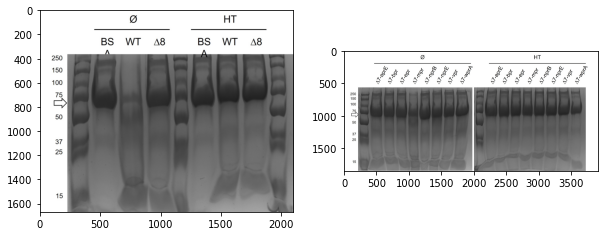

In [5]:
#IMPORT DATA
bsa_digestion_1 = mpimg.imread('/cluster/nrsw_lab/2392267/Data/Images/20210520_BSA-digestion_WT_D8.jpg')
bsa_digestion_2 = mpimg.imread('/cluster/nrsw_lab/2392267/Data/Images/20210520_BSA-digestion_D7.jpg')

fig, axs = plt.subplots(1, 2, figsize=(10,10), sharey=False)

axs[0].imshow(bsa_digestion_1, cmap=plt.cm.gray)
axs[1].imshow(bsa_digestion_2, cmap=plt.cm.gray)

## Extracellular proteases stability at 37*C

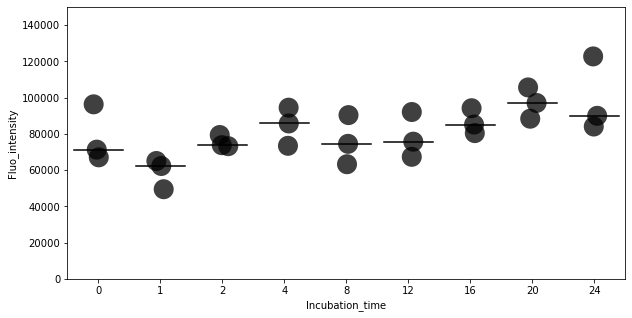

In [37]:
#IMPORT DATA
protease_stability = pd.read_csv('/cluster/nrsw_lab/2392267/Data/Protease_stability.csv')
protease_stability = protease_stability[protease_stability['Incubation_time'] < 30]

#VISUALISATION
fig, axs = plt.subplots(1, 1, figsize=(10,5), sharey=False)

sns.boxplot(x='Incubation_time', y='Fluo_intensity', data=protease_stability, whis=0, showbox=False, showcaps=False, showfliers=False, color='Black')
sns.stripplot(x='Incubation_time', y='Fluo_intensity', data=protease_stability, dodge=True, s=20, alpha=0.75,color='Black')

plt.ylim(0,150000)
plt.savefig("/cluster/nrsw_lab/2392267/Figures/ProteaseStability.png", dpi = 300)
plt.savefig("/cluster/nrsw_lab/2392267/Figures/ProteaseStability.svg", dpi = 300)
plt.show()

In [9]:
#STATISTICS
#ANOVA test
res = stat()
res.anova_stat(df=protease_stability, res_var='Fluo_intensity', anova_model='Fluo_intensity ~ C(Incubation_time)')
res.anova_summary

,df,sum_sq,mean_sq,F,PR(>F)
C(Incubation_time),8.0,3.528333e+09,4.410416e+08,2.954639,0.026791
Residual,18.0,2.686876e+09,1.492709e+08,NaN,NaN


## Extracellular proteases are essentials to support growth when BSA is the sole source of carbon or nitrogen source

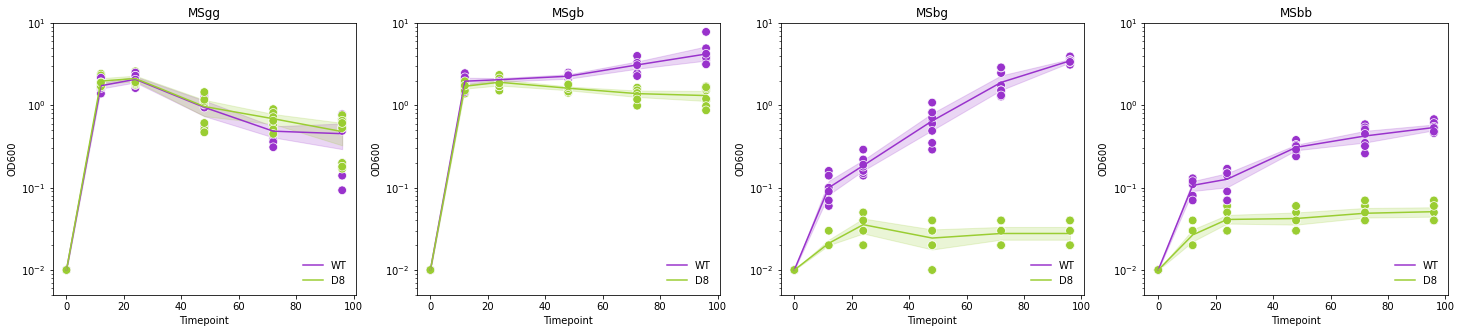

In [6]:
#IMPORT DATA
growth_data = pd.read_csv("/cluster/nrsw_lab/2392267/Data/Planktonic_growth_MSgg-MSgb-MSbg-MSbb-MSg.csv")

#DIVIDING DATASET
growth_data_msgg = growth_data[growth_data['Media'] == 'MSgg']
growth_data_msgb = growth_data[growth_data['Media'] == 'MSgb']
growth_data_msbg = growth_data[growth_data['Media'] == 'MSbg']
growth_data_msbb = growth_data[growth_data['Media'] == 'MSbb']

#VISUALISATION
fig, axs = plt.subplots(1, 4, figsize=(25, 5), sharey=False)

sns.lineplot(x='Timepoint', y='OD600', hue='Strain', data=growth_data_msgg, palette=['darkorchid','yellowgreen'], ax=axs[0])
sns.scatterplot(x='Timepoint', y='OD600', hue='Strain', data=growth_data_msgg, s=75, palette=['darkorchid','yellowgreen'], ax=axs[0])

sns.lineplot(x='Timepoint', y='OD600', hue='Strain', data=growth_data_msgb, palette=['darkorchid','yellowgreen'], ax=axs[1])
sns.scatterplot(x='Timepoint', y='OD600', hue='Strain', data=growth_data_msgb, s=75, palette=['darkorchid','yellowgreen'], ax=axs[1])

sns.lineplot(x='Timepoint', y='OD600', hue='Strain', data=growth_data_msbg, palette=['darkorchid','yellowgreen'], ax=axs[2])
sns.scatterplot(x='Timepoint', y='OD600', hue='Strain', data=growth_data_msbg, s=75, palette=['darkorchid','yellowgreen'], ax=axs[2])

sns.lineplot(x='Timepoint', y='OD600', hue='Strain', data=growth_data_msbb, palette=['darkorchid','yellowgreen'], ax=axs[3])
sns.scatterplot(x='Timepoint', y='OD600', hue='Strain', data=growth_data_msbb, s=75, palette=['darkorchid','yellowgreen'], ax=axs[3])

axs[0].set_ylim(0.005,10)
axs[1].set_ylim(0.005,10)
axs[2].set_ylim(0.005,10)
axs[3].set_ylim(0.005,10)

axs[0].set_yscale('log')
axs[1].set_yscale('log')
axs[2].set_yscale('log')
axs[3].set_yscale('log')

axs[0].set_title('MSgg')
axs[1].set_title('MSgb')
axs[2].set_title('MSbg')
axs[3].set_title('MSbb')

axs[0].legend(['WT','D8'], frameon=False, loc=4)
axs[1].legend(['WT','D8'], frameon=False, loc=4)
axs[2].legend(['WT','D8'], frameon=False, loc=4)
axs[3].legend(['WT','D8'], frameon=False, loc=4)

plt.savefig("/cluster/nrsw_lab/2392267/Figures/Planktonic_growth.png", dpi = 300)
plt.savefig("/cluster/nrsw_lab/2392267/Figures/Planktonic_growth.svg", dpi = 300)
plt.show()

In [11]:
#STATISTICS MSgg
#ANOVA test
res = stat()
res.anova_stat(df=growth_data_msgg, res_var='OD600', anova_model='OD600 ~ C(Strain)')
res.anova_summary

#Multiple pairwise comparison
#res.tukey_hsd(df=growth_data_msgg, res_var='OD600', xfac_var=['Strain','Timepoint'], anova_model='OD600 ~ C(Strain) + C(Timepoint) + C(Strain):C(Timepoint)')
#res.tukey_summary

,df,sum_sq,mean_sq,F,PR(>F)
C(Strain),1.0,0.245127,0.245127,0.436689,0.510341
Residual,94.0,52.765062,0.561330,NaN,NaN


In [12]:
#STATISTICS MSgb
#ANOVA test
res = stat()
res.anova_stat(df=growth_data_msgb, res_var='OD600', anova_model='OD600 ~ C(Strain)')
res.anova_summary

#Multiple pairwise comparison
#res.tukey_hsd(df=growth_data_msgb, res_var='OD600', xfac_var=['Strain','Timepoint'], anova_model='OD600 ~ C(Strain) + C(Timepoint) + C(Strain):C(Timepoint)')
#res.tukey_summary

,df,sum_sq,mean_sq,F,PR(>F)
C(Strain),1.0,26.818204,26.818204,29.7862,3.905578e-07
Residual,94.0,84.633529,0.900357,NaN,NaN


In [13]:
#STATISTICS MSbg
#ANOVA test
res = stat()
res.anova_stat(df=growth_data_msbg, res_var='OD600', anova_model='OD600 ~ C(Strain)')
res.anova_summary

#Multiple pairwise comparison
#res.tukey_hsd(df=growth_data_msbg, res_var='OD600', xfac_var=['Strain','Timepoint'], anova_model='OD600 ~ C(Strain) + C(Timepoint) + C(Strain):C(Timepoint)')
#res.tukey_summary

,df,sum_sq,mean_sq,F,PR(>F)
C(Strain),1.0,32.085938,32.085938,36.532828,3.005793e-08
Residual,94.0,82.558025,0.878277,NaN,NaN


In [14]:
#STATISTICS MSbb
#ANOVA test
res = stat()
res.anova_stat(df=growth_data_msbb, res_var='OD600', anova_model='OD600 ~ C(Strain)')
res.anova_summary

#Multiple pairwise comparison
#res.tukey_hsd(df=growth_data_msbb, res_var='OD600', xfac_var=['Strain','Timepoint'], anova_model='OD600 ~ C(Strain) + C(Timepoint) + C(Strain):C(Timepoint)')
#res.tukey_summary

,df,sum_sq,mean_sq,F,PR(>F)
C(Strain),1.0,1.413776,1.413776,79.599361,3.602442e-14
Residual,94.0,1.669548,0.017761,NaN,NaN


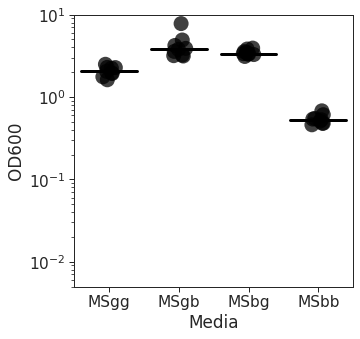

In [111]:
#IMPORT DATA
growth_data_msgg_24 = growth_data_msgg[(growth_data_msgg['Strain'] == 'NCIB3610')&(growth_data_msgg['Timepoint'] == 24)]
growth_data_msgb_96 = growth_data_msgb[(growth_data_msgb['Strain'] == 'NCIB3610')&(growth_data_msgb['Timepoint'] == 96)]
growth_data_msbg_96 = growth_data_msbg[(growth_data_msbg['Strain'] == 'NCIB3610')&(growth_data_msbg['Timepoint'] == 96)]
growth_data_msbb_96 = growth_data_msbb[(growth_data_msbb['Strain'] == 'NCIB3610')&(growth_data_msbb['Timepoint'] == 96)]

growth_yield = pd.concat([growth_data_msgg_24, growth_data_msgb_96, growth_data_msbg_96, growth_data_msbb_96])

#VISUALISATION
fig, axs = plt.subplots(1, 1, figsize=(5, 5), sharey=False)

sns.boxplot(x='Media', y='OD600',  data=growth_yield, whis=0, showbox=False, showcaps=False, showfliers=False, color='Black')
sns.stripplot(x='Media', y='OD600',  data=growth_yield, s=15, alpha=0.75, color='Black')

plt.yscale('log')
plt.ylim(0.005,10)

plt.savefig("/cluster/nrsw_lab/2392267/Figures/Planktonic_growth_2.png", dpi = 300)
plt.savefig("/cluster/nrsw_lab/2392267/Figures/Planktonic_growth_2.svg", dpi = 300)
plt.show()

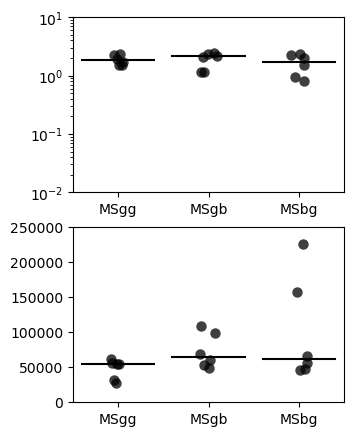

In [11]:
#IMPORT DATASET
data = pd.read_csv('/cluster/nrsw_lab/2392267/Data/Protease-activity_MSgg-MSgb-MSbg-MSbb.csv')

#NORMALISATION OF EXTRACELLULAR PROTEASE ACTIVITY
Fluo_norm = []
for index, row in data.iterrows():
    Fluo = row['Fluo_intensity']
    Yield = row['Yield']
    Fluo_norm.append(Fluo/Yield)
    
data['Fluo_normalised'] = Fluo_norm

#EXTRACTING SIMILAR YIELD FOR EACH MEDIUM
data_wt = data[data['Strain'] == 'NCIB3610']
MSgg = data_wt[data_wt['Medium'] == 'MSgg']
MSgb = data_wt[data_wt['Medium'] == 'MSgb']
MSbg = data_wt[data_wt['Medium'] == 'MSbg']

MSgg_12 = MSgg[MSgg['Timepoint'] == 12]
MSgb_12 = MSgb[MSgb['Timepoint'] == 12]
MSbg_48 = MSbg[MSbg['Timepoint'] == 48]

new_data = pd.concat([MSgg_12,MSgb_12,MSbg_48])

#VISUALISATION
fig, axs = plt.subplots(2, 1, figsize=(3.5,5), sharey=False)

sns.boxplot(x='Medium', y='Yield', data=new_data, whis=0, showbox=False, showcaps=False, showfliers=False, color='Black', ax=axs[0])
sns.stripplot(x='Medium', y='Yield', data=new_data, s=7.5, alpha=0.75, color='black', ax=axs[0])

axs[0].set_yscale('log')
axs[0].set_ylim(0.01,10)
axs[0].set_ylabel('')
axs[0].set_xlabel('')


sns.boxplot(x='Medium', y='Fluo_normalised', data=new_data, whis=0, showbox=False, showcaps=False, showfliers=False, color='Black', ax=axs[1])
sns.stripplot(x='Medium', y='Fluo_normalised', data=new_data, s=7.5, alpha=0.75, color='black', ax=axs[1])
axs[1].set_ylim(0, 250000)
axs[1].set_ylabel('')
axs[1].set_xlabel('')

plt.savefig("/cluster/nrsw_lab/2392267/Figures/ProteaseActivity_media.png", dpi = 300)
plt.savefig("/cluster/nrsw_lab/2392267/Figures/ProteaseActivity_media.svg", dpi = 300)
plt.show()

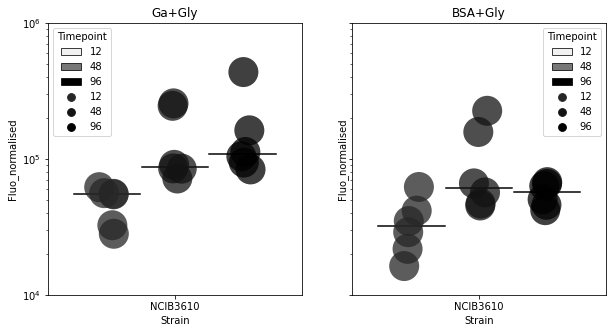

In [11]:
#IMPORT DATA
exoprotease_activity = pd.read_csv(r"C:\Users\Thibault Rosazza\OneDrive - University of Dundee\Documents\_PhD_\Code\Jupyter_Notebooks\Data\Protease-activity_MSgg-MSgb-MSbg-MSbb.csv")

#NORMALISATION OF EXO ACTIVITY BASED ON YIELD OF GROWTH
Fluo_norm = []

for index, row in exoprotease_activity.iterrows():
    if row['Strain'] == 'NRS5645':
        Fluo_norm.append(row['Fluo_intensity'])
    else:
        Fluo = row['Fluo_intensity']
        Yield = row['Yield']
        Fluo_norm.append(Fluo/Yield)
    
exoprotease_activity['Fluo_normalised'] = Fluo_norm
exoprotease_activity.head()

#DIVIDING DATASETS BASED ON MEDIA

exoprotease_activity_msgg = exoprotease_activity[exoprotease_activity['Medium'] == 'MSgg']
exoprotease_activity_msgg = exoprotease_activity_msgg[exoprotease_activity_msgg['Strain'] == 'NCIB3610']

exoprotease_activity_msgb = exoprotease_activity[exoprotease_activity['Medium'] == 'MSgb']
exoprotease_activity_msgb = exoprotease_activity_msgb[exoprotease_activity_msgb['Strain'] == 'NCIB3610']

exoprotease_activity_msbg = exoprotease_activity[exoprotease_activity['Medium'] == 'MSbg']
exoprotease_activity_msbg = exoprotease_activity_msbg[exoprotease_activity_msbg['Strain'] == 'NCIB3610']

exoprotease_activity_msbb = exoprotease_activity[exoprotease_activity['Medium'] == 'MSbb']
exoprotease_activity_msbb = exoprotease_activity_msbb[exoprotease_activity_msbb['Strain'] == 'NCIB3610']

#VISUALISATION

fig, axs = plt.subplots(1,2, figsize=(10,5), sharey=True)

sns.boxplot(x='Strain', y='Fluo_normalised', hue='Timepoint', data=exoprotease_activity_msgg, whis=0, showbox=False, showcaps=False, showfliers=False, color='Black', ax=axs[0])
sns.stripplot(x='Strain', y='Fluo_normalised', hue='Timepoint', dodge=True, data=exoprotease_activity_msgg, s=30, color='Black', alpha=0.75, ax=axs[0])

sns.boxplot(x='Strain', y='Fluo_normalised', hue='Timepoint', data=exoprotease_activity_msbg, whis=0, showbox=False, showcaps=False, showfliers=False, color='Black', ax=axs[1])
sns.stripplot(x='Strain', y='Fluo_normalised', hue='Timepoint', dodge=True, data=exoprotease_activity_msbg, s=30, color='Black', alpha=0.75, ax=axs[1])

axs[0].set_ylim(10000,1000000)
axs[0].set_yscale('log')

axs[0].set_title('Ga+Gly')
axs[1].set_title('BSA+Gly')

plt.savefig(r"C:\Users\Thibault Rosazza\OneDrive - University of Dundee\Documents\_PhD_\Code\Jupyter_Notebooks\Figure\Protease-activity_MSgg-MSbg.png", dpi = 300)
plt.savefig(r"C:\Users\Thibault Rosazza\OneDrive - University of Dundee\Documents\_PhD_\Code\Jupyter_Notebooks\Figure\Protease-activity_MSgg-MSbg.svg", dpi = 300)
plt.show()

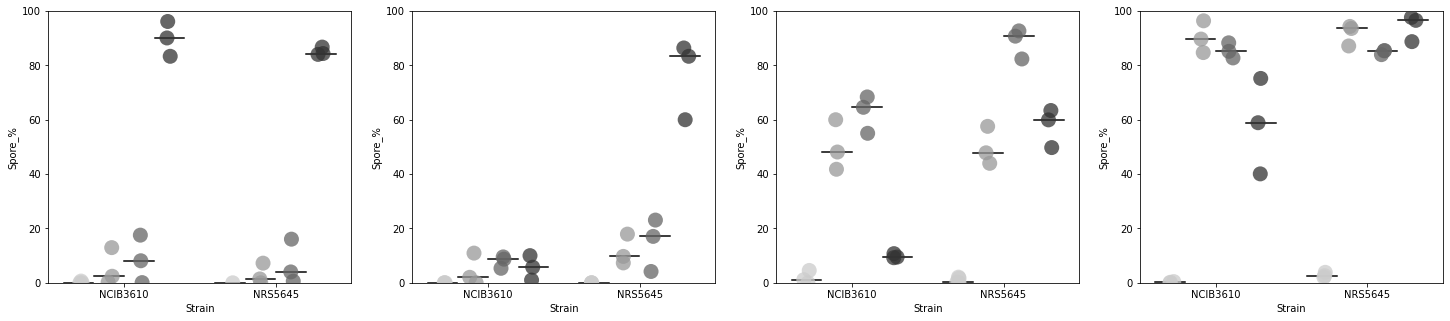

In [15]:
#IMPORT DATA
spore_count = pd.read_csv("/cluster/nrsw_lab/2392267/Data/Planktonic_sporulation_merge.csv")

#CALCULATING CFU/ML
CFU_mL = []

for index, row in spore_count.iterrows():
    Count = row['Count']
    Dilution = row['Dilution']
    CFU_mL.append((Count/Dilution)*10)

spore_count['CFU/mL'] = CFU_mL

#CALCULATING THE % OF SPORE
p_spore = []

for index, row in spore_count.iterrows():
    if row['Heat_Treatment'] == 1:
        CFU_mL_HT = row['CFU/mL']
        CFU_mL_noHT = spore_count.loc[(index-1),'CFU/mL']
        p_spore.append((CFU_mL_HT/CFU_mL_noHT)*100)
       
    else:
        p_spore.append('NaN')

spore_count['Spore_%'] = p_spore 
spore_count['Spore_%'] = spore_count['Spore_%'].astype(float)

#DIVIDING DATASET
spore_count_msgg = spore_count[spore_count['Medium'] == 'MSgg']
spore_count_msgb = spore_count[spore_count['Medium'] == 'MSgb']
spore_count_msbg = spore_count[spore_count['Medium'] == 'MSbg']
spore_count_msbb = spore_count[spore_count['Medium'] == 'MSbb']

#VISUALISATION
fig, axs = plt.subplots(1, 4, figsize=(25, 5), sharey=False)

sns.boxplot(x='Strain', y='Spore_%', hue='Timepoint', data=spore_count_msgg, whis=0, showbox=False, showcaps=False, showfliers=False, color='Black', ax= axs[0])
sns.stripplot(x='Strain', y='Spore_%', hue='Timepoint', data=spore_count_msgg, dodge=True, s=15, palette='binary', alpha=0.75, ax=axs[0])
sns.boxplot(x='Strain', y='Spore_%', hue='Timepoint', data=spore_count_msgb, whis=0, showbox=False, showcaps=False, showfliers=False, color='Black', ax= axs[1])
sns.stripplot(x='Strain', y='Spore_%', hue='Timepoint', data=spore_count_msgb, dodge=True, s=15, palette='binary', alpha=0.75, ax=axs[1])
sns.boxplot(x='Strain', y='Spore_%', hue='Timepoint', data=spore_count_msbg, whis=0, showbox=False, showcaps=False, showfliers=False, color='Black', ax= axs[2])
sns.stripplot(x='Strain', y='Spore_%', hue='Timepoint', data=spore_count_msbg, dodge=True, s=15, palette='binary', alpha=0.75, ax=axs[2])
sns.boxplot(x='Strain', y='Spore_%', hue='Timepoint', data=spore_count_msbb, whis=0, showbox=False, showcaps=False, showfliers=False, color='Black', ax= axs[3])
sns.stripplot(x='Strain', y='Spore_%', hue='Timepoint', data=spore_count_msbb, dodge=True, s=15, palette='binary', alpha=0.75, ax=axs[3])

axs[0].set_ylim(0,100)
axs[1].set_ylim(0,100)
axs[2].set_ylim(0,100)
axs[3].set_ylim(0,100)

axs[0].legend([], frameon=False)
axs[1].legend([], frameon=False)
axs[2].legend([], frameon=False)
axs[3].legend([], frameon=False)

plt.savefig("/cluster/nrsw_lab/2392267/Figures/Spore_MSgg_MSgb_MSgb_MSbb.png", dpi = 300)
plt.savefig("/cluster/nrsw_lab/2392267/Figures/Spore_MSgg_MSgb_MSgb_MSbb.svg", dpi = 300)
plt.show()

In [16]:
#STATISTICS MSgg
#Multiple pairwise comparison
res = stat()
res.tukey_hsd(df=spore_count_msgg, res_var='Count', xfac_var=['Strain','Timepoint'], anova_model='Count ~ C(Strain) + C(Timepoint) + C(Strain):C(Timepoint)')
res.tukey_summary

/cluster/nrsw_lab/2392267/conda/envs/my_env/lib/python3.9/site-packages/bioinfokit/analys.py:368: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  mult_group[(ele1, ele2)] = df[(df[xfac_var[0]] == ele1) &


,group1,group2,Diff,Lower,Upper,q-value,p-value
0,"(NCIB3610, 6)","(NCIB3610, 12)",68.666667,-833.384171,970.717505,0.379901,0.900000
1,"(NCIB3610, 6)","(NCIB3610, 24)",38.666667,-863.384171,940.717505,0.213925,0.900000
2,"(NCIB3610, 6)","(NCIB3610, 48)",465.000000,-437.050838,1367.050838,2.572634,0.606989
3,"(NCIB3610, 6)","(NRS5645, 6)",1.666667,-1274.025862,1277.359196,0.006520,0.900000
4,"(NCIB3610, 6)","(NRS5645, 12)",39.000000,-863.050838,941.050838,0.215769,0.900000
5,"(NCIB3610, 6)","(NRS5645, 24)",49.666667,-852.384171,951.717505,0.274783,0.900000
6,"(NCIB3610, 6)","(NRS5645, 48)",403.000000,-499.050838,1305.050838,2.229616,0.733390
7,"(NCIB3610, 12)","(NCIB3610, 24)",30.000000,-872.050838,932.050838,0.165976,0.900000
8,"(NCIB3610, 12)","(NCIB3610, 48)",396.333333,-505.717505,1298.384171,2.192732,0.746982
9,"(NCIB3610, 12)","(NRS5645, 6)",70.333333,-1205.359196,1346.025862,0.275151,0.900000


In [ ]:
#STATISTICS MSgb
#Multiple pairwise comparison
res = stat()
res.tukey_hsd(df=spore_count_msgb, res_var='Count', xfac_var=['Strain','Timepoint'], anova_model='Count ~ C(Strain) + C(Timepoint) + C(Strain):C(Timepoint)')
res.tukey_summary

In [ ]:
#STATISTICS MSbg
#Multiple pairwise comparison
res = stat()
res.tukey_hsd(df=spore_count_msbg, res_var='Count', xfac_var=['Strain','Timepoint'], anova_model='Count ~ C(Strain) + C(Timepoint) + C(Strain):C(Timepoint)')
res.tukey_summary

In [ ]:
#STATISTICS MSbb
#Multiple pairwise comparison
res = stat()
res.tukey_hsd(df=spore_count_msbb, res_var='Count', xfac_var=['Strain','Timepoint'], anova_model='Count ~ C(Strain) + C(Timepoint) + C(Strain):C(Timepoint)')
res.tukey_summary

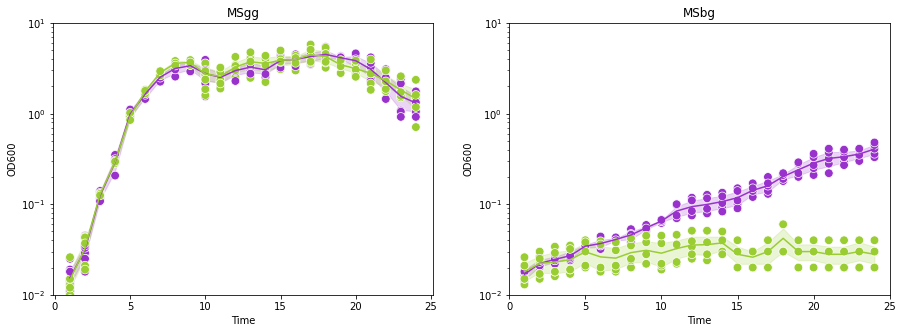

In [30]:
#IMPORTING DATA
msgg_data = pd.read_csv("/cluster/nrsw_lab/2392267/Data/Planktonic-growth_MSgg_merge.csv")
msbg_data = pd.read_csv("/cluster/nrsw_lab/2392267/Data/Planktonic-growth_MSbg_merge.csv")

#EXTRACTING DATA
growth_data_96 = growth_data[growth_data['Timepoint'] == 96]
growth_data_96_MSg_MSgb = growth_data_96[(growth_data_96['Media'] == 'MSg')|(growth_data_96['Media'] == 'MSgb')]
                                       
#VISUALISATION
fig, axs = plt.subplots(1,2, figsize=(15,5), sharey=False)

sns.lineplot(x='Time', y='OD600', hue='Strain', data=msgg_data, palette=['darkorchid','yellowgreen'], ax= axs[0])
sns.scatterplot(x='Time', y='OD600', hue='Strain', data=msgg_data, s=75, palette=['darkorchid','yellowgreen'], ax= axs[0])
axs[0].set_yscale('log')
axs[0].set_ylim(0.01,10)
axs[0].set_title('MSgg')
axs[0].legend('', frameon=False)

sns.lineplot(x='Time', y='OD600', hue='Strain', data=msbg_data, palette=['darkorchid','yellowgreen'], ax= axs[1])
sns.scatterplot(x='Time', y='OD600', hue='Strain', data=msbg_data, s=75, palette=['darkorchid','yellowgreen'], ax= axs[1])
axs[1].set_yscale('log')
axs[1].set_ylim(0.01,10)
axs[1].set_xlim(0,25)
axs[1].set_title('MSbg')
axs[1].legend('', frameon=False)

plt.savefig("/cluster/nrsw_lab/2392267/Figures/Planktonic_growth_3.png", dpi = 300)
plt.savefig("/cluster/nrsw_lab/2392267/Figures/Planktonic_growth_3.svg", dpi = 300)
plt.show()                                  

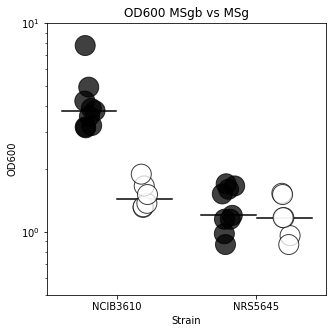

In [35]:
fig, axs = plt.subplots(1,1, figsize=(5,5), sharey=False)

sns.boxplot(x='Strain', y='OD600', hue='Media', data=growth_data_96_MSg_MSgb, whis=0, showbox=False, showcaps=False, showfliers=False, color='Black')
sns.stripplot(x='Strain', y='OD600',hue='Media', data=growth_data_96_MSg_MSgb, dodge=True, s=20, alpha=0.75, palette=['black','white'], edgecolor='black', linewidth=1)
plt.yscale('log')
plt.ylim(0.5,10)
plt.legend('', frameon=False, loc=1)
plt.title('OD600 MSgb vs MSg')

plt.savefig("/cluster/nrsw_lab/2392267/Figures/Planktonic_growth_4.png", dpi = 300)
plt.savefig("/cluster/nrsw_lab/2392267/Figures/Planktonic_growth_4.svg", dpi = 300)
plt.show()  

In [22]:
#STATISTICS MSgg
#ANOVA test
res = stat()
res.anova_stat(df=msgg_data, res_var='OD600', anova_model='OD600 ~ C(Strain)')
res.anova_summary

,df,sum_sq,mean_sq,F,PR(>F)
C(Strain),1.0,0.707759,0.707759,0.310946,0.577559
Residual,272.0,619.112215,2.276148,NaN,NaN


In [23]:
#STATISTICS MSgb vs MSg
#ANOVA test
res = stat()
res.anova_stat(df=msbg_data, res_var='OD600', anova_model='OD600 ~ C(Strain)')
res.anova_summary

,df,sum_sq,mean_sq,F,PR(>F)
C(Strain),1.0,0.713732,0.713732,93.99738,6.030741e-19
Residual,238.0,1.807160,0.007593,NaN,NaN


In [24]:
#STATISTICS MSgb vs MSg
#ANOVA test
res = stat()
res.anova_stat(df=growth_data_96_MSg_MSgb, res_var='OD600', anova_model='OD600 ~ C(Strain)')
res.anova_summary

,df,sum_sq,mean_sq,F,PR(>F)
C(Strain),1.0,25.798413,25.798413,16.155724,0.000399
Residual,28.0,44.712053,1.596859,NaN,NaN


## Investigation of extracellular protease single deletion

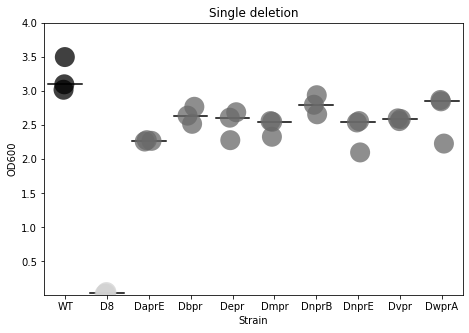

In [42]:
#IMPORT DATA
single_deletion = pd.read_csv('/cluster/nrsw_lab/2392267/Data/Planktonic_growth_singledeletion.csv')

#VISUALISATION
fig, axs = plt.subplots(1,1, figsize=(7.5,5), sharey=True)

sns.boxplot(x='Strain', y='OD600', data=single_deletion, whis=0, showbox=False, showcaps=False, showfliers=False, color='Black')
sns.stripplot(x='Strain', y='OD600', data=single_deletion, dodge=True, s=20, alpha=0.75, palette=['black','lightgray','dimgray','dimgray','dimgray','dimgray','dimgray','dimgray','dimgray','dimgray'])

plt.title('Single deletion')
plt.ylim(0.01,4)
#plt.yscale('log')
labels=['WT','D8','DaprE','Dbpr','Depr','Dmpr','DnprB','DnprE','Dvpr','DwprA']
plt.xticks(np.arange(10), labels)

plt.savefig("/cluster/nrsw_lab/2392267/Figures/Growth_singledeletion.png", dpi = 300)
plt.savefig("/cluster/nrsw_lab/2392267/Figures/Growth_singledeletion.svg", dpi = 300)
plt.show()

In [40]:
#STATISTICS Single deletion
single_deletion = single_deletion[single_deletion['Strain'] != 'NRS5645']

#ANOVA test
res = stat()
res.anova_stat(df=single_deletion, res_var='OD600', anova_model='OD600 ~ C(Strain)')
res.anova_summary

,df,sum_sq,mean_sq,F,PR(>F)
C(Strain),8.0,1.735600,0.21695,5.33435,0.001548
Residual,18.0,0.732067,0.04067,NaN,NaN


## Investigation of extracellular protease mono-producers

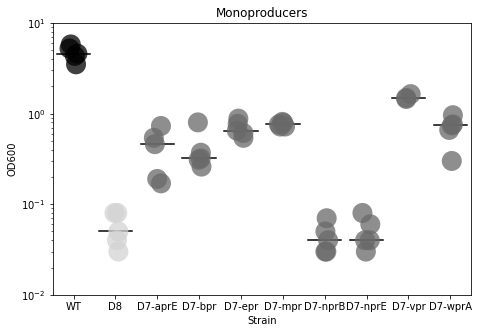

In [4]:
#IMPORT DATA
monoproducers = pd.read_csv('/cluster/nrsw_lab/2392267/Data/Planktonic_growth_monoproducers.csv')

#VISUALISATION
fig, axs = plt.subplots(1,1, figsize=(7.5,5), sharey=True)

sns.boxplot(x='Strain', y='OD600', data=monoproducers, whis=0, showbox=False, showcaps=False, showfliers=False, color='Black')
sns.stripplot(x='Strain', y='OD600', data=monoproducers, dodge=True, s=20, alpha=0.75, palette=['black','lightgray','dimgray','dimgray','dimgray','dimgray','dimgray','dimgray','dimgray','dimgray'])

plt.title('Monoproducers')
plt.ylim(0.01, 10)
plt.yscale('log')
labels=['WT','D8','D7-aprE','D7-bpr','D7-epr','D7-mpr','D7-nprB','D7-nprE','D7-vpr','D7-wprA']
plt.xticks(np.arange(10), labels)


plt.savefig("/cluster/nrsw_lab/2392267/Figures/Growth_monoproducers.png", dpi = 300)
plt.savefig("/cluster/nrsw_lab/2392267/Figures/Growth_monoproducers.svg", dpi = 300)
plt.show()

In [27]:
#STATISTICS MSbb
#ANOVA test
res = stat()
res.anova_stat(df=spore_count_msgg, res_var='Count', anova_model='Count ~ C(Strain)')
res.anova_summary

#Multiple pairwise comparison
#res.tukey_hsd(df=spore_count_msbb, res_var='Count', xfac_var=['Strain','Timepoint'], anova_model='Count ~ C(Strain) + C(Timepoint) + C(Strain):C(Timepoint)')
#res.tukey_summary

,df,sum_sq,mean_sq,F,PR(>F)
C(Strain),1.0,1.915227e+01,19.152273,0.00004,0.994963
Residual,42.0,1.994579e+07,474899.656548,NaN,NaN


## Influence of BSA concentration on the growth

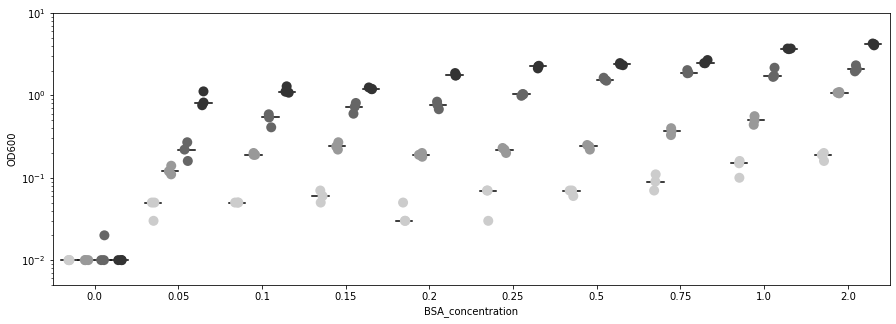

In [8]:
#IMPORT DATA
BSA_concentrations = pd.read_csv("/cluster/nrsw_lab/2392267/Data/Growth_BSA_concentrations.csv")

#VISUALISATION
fig, axs = plt.subplots(1, 1, figsize=(15, 5), sharey=False)
sns.stripplot(x='BSA_concentration', y='OD600', hue='Timepoint', data=BSA_concentrations, dodge=True, s=10, palette='binary')
sns.boxplot(x='BSA_concentration', y='OD600', hue='Timepoint', data=BSA_concentrations, whis=0, showbox=False, showcaps=False, showfliers=False, color='Black')

plt.legend([], frameon=False)
plt.yscale('log')
plt.ylim(0.005,10)

plt.savefig("/cluster/nrsw_lab/2392267/Figures/BSA_concentrations.png", dpi = 300)
plt.savefig("/cluster/nrsw_lab/2392267/Figures/BSA_concentrations.svg", dpi = 300)
plt.show()

In [9]:
#STATISTICS
#ANOVA test
res = stat()
res.anova_stat(df=BSA_concentrations, res_var='OD600', anova_model='OD600 ~ C(BSA_concentration)')
res.anova_summary

#Multiple pairwise comparison
#res.tukey_hsd(df=BSA_concentrations, res_var='OD600', xfac_var=['BSA_concentration','Timepoint'], anova_model='OD600 ~ C(BSA_concentration) + C(Timepoint) + C(BSA_concentration):C(Timepoint)')
#res.tukey_summary

,df,sum_sq,mean_sq,F,PR(>F)
C(BSA_concentration),9.0,35.807507,3.978612,4.625589,0.000034
Residual,110.0,94.614392,0.860131,NaN,NaN


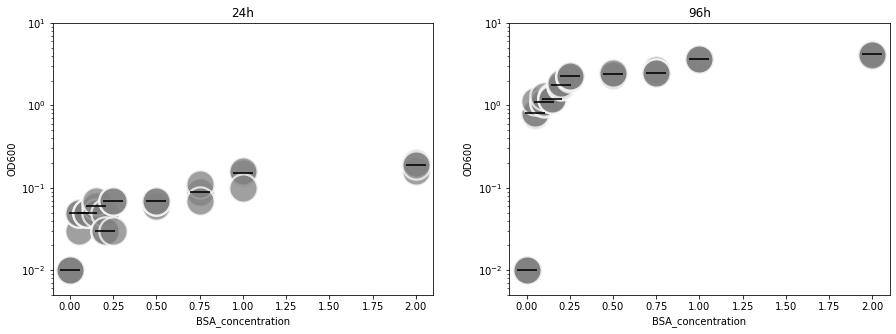

In [10]:
#DIVIDING DATASET
BSA_concentrations_24 = BSA_concentrations[BSA_concentrations['Timepoint'] == 24]
BSA_concentrations_96 = BSA_concentrations[BSA_concentrations['Timepoint'] == 96]
BSA_concentrations_24_m = BSA_concentrations_24.groupby(['BSA_concentration']).median()
BSA_concentrations_96_m = BSA_concentrations_96.groupby(['BSA_concentration']).median()


#VISUALISATION
fig, axs = plt.subplots(1, 2, figsize=(15, 5), sharey=False)
sns.scatterplot(x='BSA_concentration', y='OD600', data=BSA_concentrations_24, s=800, alpha= 0.75, color='Grey', ax=axs[0])
sns.scatterplot(x='BSA_concentration', y='OD600', data=BSA_concentrations_24_m,marker='_', s=400, color='Black', ax=axs[0])
sns.scatterplot(x='BSA_concentration', y='OD600', data=BSA_concentrations_96, s=800, alpha= 0.75, color='Grey', ax=axs[1])
sns.scatterplot(x='BSA_concentration', y='OD600', data=BSA_concentrations_96_m,marker='_', s=400, color='Black', ax=axs[1])

axs[0].set_yscale('log')
axs[0].set_ylim(0.005,10)
axs[0].set_title('24h')

axs[1].set_yscale('log')
axs[1].set_ylim(0.005,10)
axs[1].set_title('96h')

plt.savefig("/cluster/nrsw_lab/2392267/Figures/BSA_concentrations_2.png", dpi = 300)
plt.savefig("/cluster/nrsw_lab/2392267/Figures/BSA_concentrations_2.svg", dpi = 300)
plt.show()

In [11]:
#STATISTICS 24h
BSA_concentrations_24 = BSA_concentrations_24[BSA_concentrations_24['BSA_concentration']>0]
#ANOVA test
res = stat()
res.anova_stat(df=BSA_concentrations_24, res_var='OD600', anova_model='OD600 ~ C(BSA_concentration)')
res.anova_summary

,df,sum_sq,mean_sq,F,PR(>F)
C(BSA_concentration),8.0,0.057696,0.007212,23.181548,5.697743e-08
Residual,18.0,0.005600,0.000311,NaN,NaN


In [12]:
#STATISTICS 96h
BSA_concentrations_96 = BSA_concentrations_96[BSA_concentrations_96['BSA_concentration']>0]
#ANOVA test
res = stat()
res.anova_stat(df=BSA_concentrations_96, res_var='OD600', anova_model='OD600 ~ C(BSA_concentration)')
res.anova_summary

,df,sum_sq,mean_sq,F,PR(>F)
C(BSA_concentration),8.0,30.477067,3.809633,352.743827,3.569647e-18
Residual,18.0,0.194400,0.010800,NaN,NaN


In [13]:
#EXPONENTIAL REGRESSION FUNCTION
def exponential_regression(dataset):
    
    dataset_1 = dataset[dataset['Replicate'] == 1]
    dataset_2 = dataset[dataset['Replicate'] == 2]
    dataset_3 = dataset[dataset['Replicate'] == 3]
    
    x1 = dataset_1['Timepoint']
    x2 = dataset_2['Timepoint']
    x3 = dataset_3['Timepoint']
    y1 = dataset_1['OD600']
    y2 = dataset_2['OD600']
    y3 = dataset_3['OD600']
    
    [c1, d1] = np.polyfit(x1, np.log(y1), 1)
    a1 = np.exp(d1)
    b1 = np.exp(c1)
    [c2, d2] = np.polyfit(x2, np.log(y2), 1)
    a2 = np.exp(d2)
    b2 = np.exp(c2)
    [c3, d3] = np.polyfit(x3, np.log(y3), 1)
    a3 = np.exp(d3)
    b3 = np.exp(c3)
    
    model = []
    slope = []
    for index, row in dataset.iterrows():
        time = dataset.loc[index,'Timepoint']
        
        if dataset.loc[index,'Replicate'] == 1:
            prediction = a1*b1**time
            model.append(prediction)
            slope.append(c1)
        elif dataset.loc[index,'Replicate'] == 2:
            prediction = a2*b2**time
            model.append(prediction) 
            slope.append(c2)
        elif dataset.loc[index,'Replicate'] == 3:
            prediction = a3*b3**time
            model.append(prediction)
            slope.append(c3)
        
    dataset['Model'] = model
    dataset['Slope'] = slope

/tmp/695754.1.priority.q/ipykernel_24335/3939784931.py:43: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset['Model'] = model
/tmp/695754.1.priority.q/ipykernel_24335/3939784931.py:44: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset['Slope'] = slope


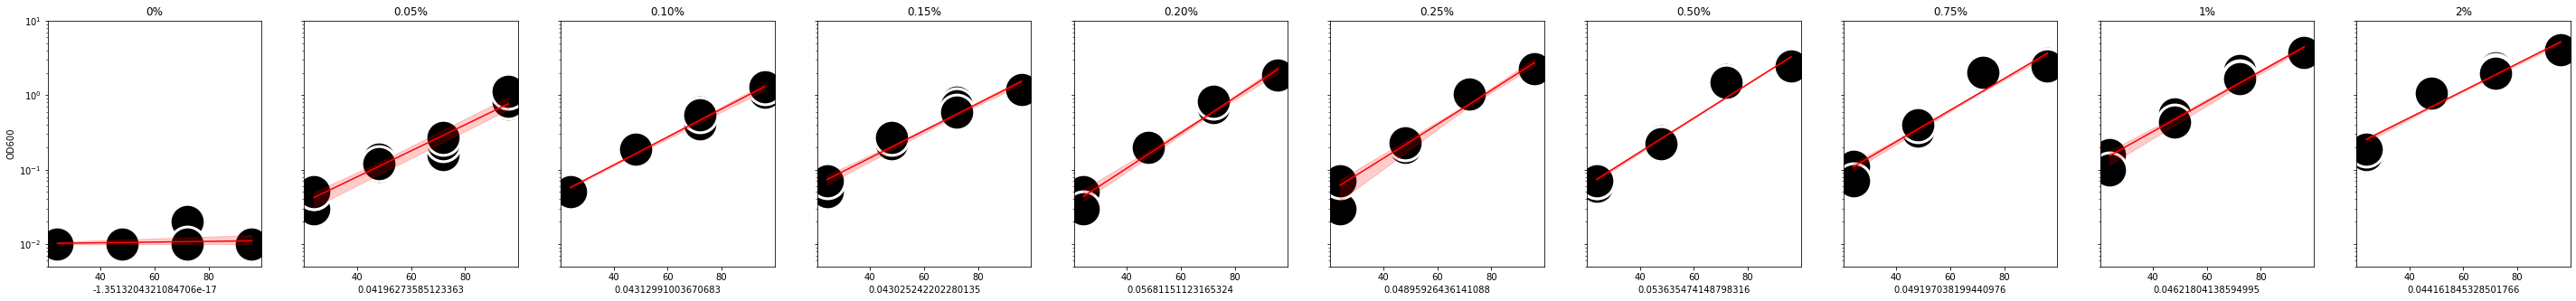

In [14]:
#EXPONENTIAL REGRESSION

#DIVING DATASET
BSA_concentrations_0 = BSA_concentrations[BSA_concentrations['BSA_concentration'] == 0]
BSA_concentrations_005 = BSA_concentrations[BSA_concentrations['BSA_concentration'] == 0.05]
BSA_concentrations_01 = BSA_concentrations[BSA_concentrations['BSA_concentration'] == 0.1]
BSA_concentrations_015 = BSA_concentrations[BSA_concentrations['BSA_concentration'] == 0.15]
BSA_concentrations_02 = BSA_concentrations[BSA_concentrations['BSA_concentration'] == 0.2]
BSA_concentrations_025 = BSA_concentrations[BSA_concentrations['BSA_concentration'] == 0.25]
BSA_concentrations_05 = BSA_concentrations[BSA_concentrations['BSA_concentration'] == 0.5]
BSA_concentrations_075 = BSA_concentrations[BSA_concentrations['BSA_concentration'] == 0.75]
BSA_concentrations_1 = BSA_concentrations[BSA_concentrations['BSA_concentration'] == 1]
BSA_concentrations_2 = BSA_concentrations[BSA_concentrations['BSA_concentration'] == 2]

#PERFORMING EXPONENTIAL REGRESSION REGRESSION
exponential_regression(BSA_concentrations_0)
exponential_regression(BSA_concentrations_005)
exponential_regression(BSA_concentrations_01)
exponential_regression(BSA_concentrations_015)
exponential_regression(BSA_concentrations_02)
exponential_regression(BSA_concentrations_025)
exponential_regression(BSA_concentrations_05)
exponential_regression(BSA_concentrations_075)
exponential_regression(BSA_concentrations_1)
exponential_regression(BSA_concentrations_2)

#PLOTTING DATA ALONG LINEAR REGRESSION MODEL
fig, axs = plt.subplots(1, 10, figsize=(50, 5), sharey=True)

sns.scatterplot(x='Timepoint', y='OD600',  data=BSA_concentrations_0, s=1500, color=['Black'], ax=axs[0])
sns.lineplot(x='Timepoint', y='Model', data=BSA_concentrations_0, color='red', ax=axs[0])

sns.scatterplot(x='Timepoint', y='OD600',  data=BSA_concentrations_005, s=1500, color=['Black'], ax=axs[1])
sns.lineplot(x='Timepoint', y='Model', data=BSA_concentrations_005, color='red', ax=axs[1])

sns.scatterplot(x='Timepoint', y='OD600',  data=BSA_concentrations_01, s=1500, color=['Black'], ax=axs[2])
sns.lineplot(x='Timepoint', y='Model', data=BSA_concentrations_01, color='red', ax=axs[2])

sns.scatterplot(x='Timepoint', y='OD600',  data=BSA_concentrations_015, s=1500, color=['Black'], ax=axs[3])
sns.lineplot(x='Timepoint', y='Model', data=BSA_concentrations_015, color='red', ax=axs[3])

sns.scatterplot(x='Timepoint', y='OD600',  data=BSA_concentrations_02, s=1500, color=['Black'], ax=axs[4])
sns.lineplot(x='Timepoint', y='Model', data=BSA_concentrations_02, color='red', ax=axs[4])

sns.scatterplot(x='Timepoint', y='OD600',  data=BSA_concentrations_025, s=1500, color=['Black'], ax=axs[5])
sns.lineplot(x='Timepoint', y='Model', data=BSA_concentrations_025, color='red', ax=axs[5])

sns.scatterplot(x='Timepoint', y='OD600',  data=BSA_concentrations_05, s=1500, color=['Black'], ax=axs[6])
sns.lineplot(x='Timepoint', y='Model', data=BSA_concentrations_05, color='red', ax=axs[6])

sns.scatterplot(x='Timepoint', y='OD600',  data=BSA_concentrations_075, s=1500, color=['Black'], ax=axs[7])
sns.lineplot(x='Timepoint', y='Model', data=BSA_concentrations_075, color='red', ax=axs[7])

sns.scatterplot(x='Timepoint', y='OD600',  data=BSA_concentrations_1, s=1500, color=['Black'], ax=axs[8])
sns.lineplot(x='Timepoint', y='Model', data=BSA_concentrations_1, color='red', ax=axs[8])

sns.scatterplot(x='Timepoint', y='OD600',  data=BSA_concentrations_2, s=1500, color=['Black'], ax=axs[9])
sns.lineplot(x='Timepoint', y='Model', data=BSA_concentrations_2, color='red', ax=axs[9])


#axs[0].set_yscale('log')
axs[0].set_ylim(0.005,10)
axs[0].set_xlabel(BSA_concentrations_0['Slope'][0])
axs[0].set_title('0%')

#axs[1].set_yscale('log')
axs[1].set_ylim(0.005,10)
axs[1].set_xlabel(BSA_concentrations_005['Slope'][12])
axs[1].set_title('0.05%')

#axs[2].set_yscale('log')
axs[2].set_ylim(0.005,10)
axs[2].set_xlabel(BSA_concentrations_01['Slope'][24])
axs[2].set_title('0.10%')

#axs[3].set_yscale('log')
axs[3].set_ylim(0.005,10)
axs[3].set_xlabel(BSA_concentrations_015['Slope'][36])
axs[3].set_title('0.15%')

#axs[4].set_yscale('log')
axs[4].set_ylim(0.005,10)
axs[4].set_xlabel(BSA_concentrations_02['Slope'][48])
axs[4].set_title('0.20%')

#axs[5].set_yscale('log')
axs[5].set_ylim(0.005,10)
axs[5].set_xlabel(BSA_concentrations_025['Slope'][60])
axs[5].set_title('0.25%')

#axs[6].set_yscale('log')
axs[6].set_ylim(0.005,10)
axs[6].set_xlabel(BSA_concentrations_05['Slope'][72])
axs[6].set_title('0.50%')

axs[7].set_yscale('log')
axs[7].set_ylim(0.005,10)
axs[7].set_xlabel(BSA_concentrations_075['Slope'][84])
axs[7].set_title('0.75%')

#axs[8].set_yscale('log')
axs[8].set_ylim(0.005,10)
axs[8].set_xlabel(BSA_concentrations_1['Slope'][96])
axs[8].set_title('1%')

#axs[9].set_yscale('log')
axs[9].set_ylim(0.005,10)
axs[9].set_xlabel(BSA_concentrations_2['Slope'][108])
axs[9].set_title('2%')

plt.savefig("/cluster/nrsw_lab/2392267/Figures/BSA_concentrations_3.png", dpi=300)
plt.savefig("/cluster/nrsw_lab/2392267/Figures/BSA_concentrations_3.svg", dpi=300)
plt.show()

/tmp/695754.1.priority.q/ipykernel_24335/3955524225.py:13: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  BSA_concentrations_2_96 = BSA_concentrations_2[BSA_concentrations['Timepoint'] < 96]
/tmp/695754.1.priority.q/ipykernel_24335/3939784931.py:43: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset['Model'] = model
/tmp/695754.1.priority.q/ipykernel_24335/3939784931.py:44: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset['Slope'] = slope


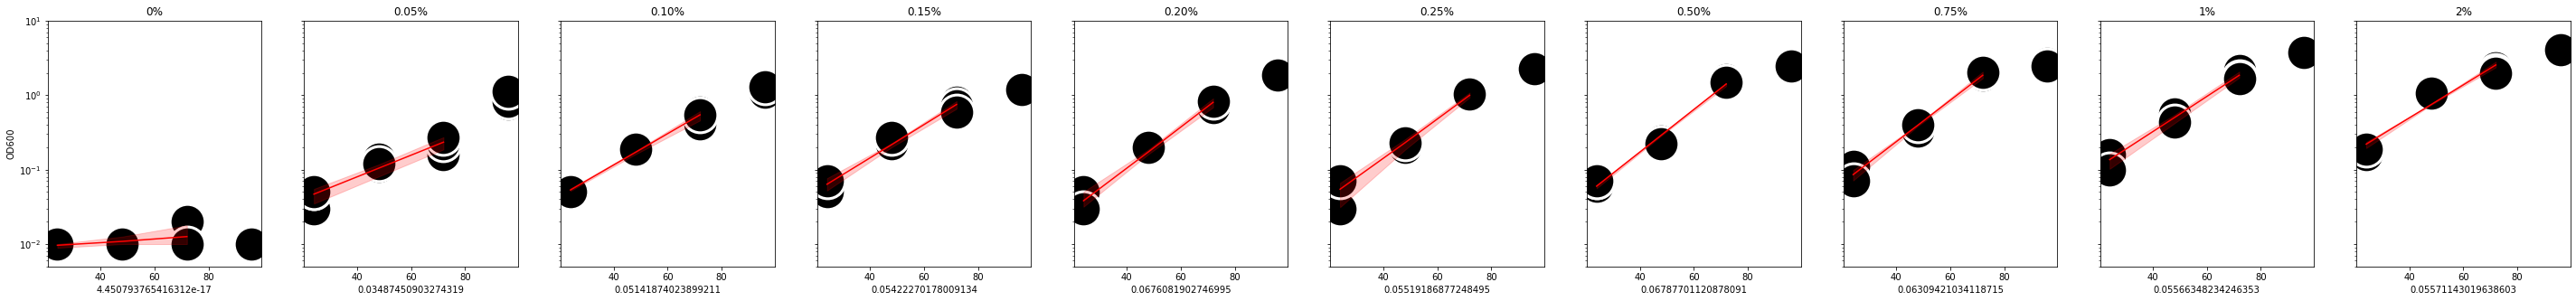

In [15]:
#EXPONENTIAL REGRESSION ON 

#DIVING DATASET
BSA_concentrations_0_96 = BSA_concentrations_0[BSA_concentrations_0['Timepoint'] < 96]
BSA_concentrations_005_96 = BSA_concentrations_005[BSA_concentrations_005['Timepoint']  < 96]
BSA_concentrations_01_96 = BSA_concentrations_01[BSA_concentrations_01['Timepoint'] < 96]
BSA_concentrations_015_96 = BSA_concentrations_015[BSA_concentrations_015['Timepoint'] < 96]
BSA_concentrations_02_96 = BSA_concentrations_02[BSA_concentrations_02['Timepoint'] < 96]
BSA_concentrations_025_96 = BSA_concentrations_025[BSA_concentrations_025['Timepoint'] < 96]
BSA_concentrations_05_96 = BSA_concentrations_05[BSA_concentrations_05['Timepoint'] < 96]
BSA_concentrations_075_96 = BSA_concentrations_075[BSA_concentrations_075['Timepoint'] < 96]
BSA_concentrations_1_96 = BSA_concentrations_1[BSA_concentrations_1['Timepoint'] < 96]
BSA_concentrations_2_96 = BSA_concentrations_2[BSA_concentrations['Timepoint'] < 96]

#PERFORMING EXPONENTIAL REGRESSION REGRESSION
exponential_regression(BSA_concentrations_0_96)
exponential_regression(BSA_concentrations_005_96)
exponential_regression(BSA_concentrations_01_96)
exponential_regression(BSA_concentrations_015_96)
exponential_regression(BSA_concentrations_02_96)
exponential_regression(BSA_concentrations_025_96)
exponential_regression(BSA_concentrations_05_96)
exponential_regression(BSA_concentrations_075_96)
exponential_regression(BSA_concentrations_1_96)
exponential_regression(BSA_concentrations_2_96)

#PLOTTING DATA ALONG LINEAR REGRESSION MODEL
fig, axs = plt.subplots(1, 10, figsize=(50, 5), sharey=True)

sns.scatterplot(x='Timepoint', y='OD600',  data=BSA_concentrations_0, s=1500, color=['Black'], ax=axs[0])
sns.lineplot(x='Timepoint', y='Model', data=BSA_concentrations_0_96, color='red', ax=axs[0])

sns.scatterplot(x='Timepoint', y='OD600',  data=BSA_concentrations_005, s=1500, color=['Black'], ax=axs[1])
sns.lineplot(x='Timepoint', y='Model', data=BSA_concentrations_005_96, color='red', ax=axs[1])

sns.scatterplot(x='Timepoint', y='OD600',  data=BSA_concentrations_01, s=1500, color=['Black'], ax=axs[2])
sns.lineplot(x='Timepoint', y='Model', data=BSA_concentrations_01_96, color='red', ax=axs[2])

sns.scatterplot(x='Timepoint', y='OD600',  data=BSA_concentrations_015, s=1500, color=['Black'], ax=axs[3])
sns.lineplot(x='Timepoint', y='Model', data=BSA_concentrations_015_96, color='red', ax=axs[3])

sns.scatterplot(x='Timepoint', y='OD600',  data=BSA_concentrations_02, s=1500, color=['Black'], ax=axs[4])
sns.lineplot(x='Timepoint', y='Model', data=BSA_concentrations_02_96, color='red', ax=axs[4])

sns.scatterplot(x='Timepoint', y='OD600',  data=BSA_concentrations_025, s=1500, color=['Black'], ax=axs[5])
sns.lineplot(x='Timepoint', y='Model', data=BSA_concentrations_025_96, color='red', ax=axs[5])

sns.scatterplot(x='Timepoint', y='OD600',  data=BSA_concentrations_05, s=1500, color=['Black'], ax=axs[6])
sns.lineplot(x='Timepoint', y='Model', data=BSA_concentrations_05_96, color='red', ax=axs[6])

sns.scatterplot(x='Timepoint', y='OD600',  data=BSA_concentrations_075, s=1500, color=['Black'], ax=axs[7])
sns.lineplot(x='Timepoint', y='Model', data=BSA_concentrations_075_96, color='red', ax=axs[7])

sns.scatterplot(x='Timepoint', y='OD600',  data=BSA_concentrations_1, s=1500, color=['Black'], ax=axs[8])
sns.lineplot(x='Timepoint', y='Model', data=BSA_concentrations_1_96, color='red', ax=axs[8])

sns.scatterplot(x='Timepoint', y='OD600',  data=BSA_concentrations_2, s=1500, color=['Black'], ax=axs[9])
sns.lineplot(x='Timepoint', y='Model', data=BSA_concentrations_2_96, color='red', ax=axs[9])


#axs[0].set_yscale('log')
axs[0].set_ylim(0.005,10)
axs[0].set_xlabel(BSA_concentrations_0_96['Slope'][0])
axs[0].set_title('0%')

#axs[1].set_yscale('log')
axs[1].set_ylim(0.005,10)
axs[1].set_xlabel(BSA_concentrations_005_96['Slope'][12])
axs[1].set_title('0.05%')

#axs[2].set_yscale('log')
axs[2].set_ylim(0.005,10)
axs[2].set_xlabel(BSA_concentrations_01_96['Slope'][24])
axs[2].set_title('0.10%')

#axs[3].set_yscale('log')
axs[3].set_ylim(0.005,10)
axs[3].set_xlabel(BSA_concentrations_015_96['Slope'][36])
axs[3].set_title('0.15%')

#axs[4].set_yscale('log')
axs[4].set_ylim(0.005,10)
axs[4].set_xlabel(BSA_concentrations_02_96['Slope'][48])
axs[4].set_title('0.20%')

#axs[5].set_yscale('log')
axs[5].set_ylim(0.005,10)
axs[5].set_xlabel(BSA_concentrations_025_96['Slope'][60])
axs[5].set_title('0.25%')

#axs[6].set_yscale('log')
axs[6].set_ylim(0.005,10)
axs[6].set_xlabel(BSA_concentrations_05_96['Slope'][72])
axs[6].set_title('0.50%')

axs[7].set_yscale('log')
axs[7].set_ylim(0.005,10)
axs[7].set_xlabel(BSA_concentrations_075_96['Slope'][84])
axs[7].set_title('0.75%')

#axs[8].set_yscale('log')
axs[8].set_ylim(0.005,10)
axs[8].set_xlabel(BSA_concentrations_1_96['Slope'][96])
axs[8].set_title('1%')

#axs[9].set_yscale('log')
axs[9].set_ylim(0.005,10)
axs[9].set_xlabel(BSA_concentrations_2_96['Slope'][108])
axs[9].set_title('2%')

plt.savefig("/cluster/nrsw_lab/2392267/Figures/BSA_concentrations_4.png", dpi=300)
plt.savefig("/cluster/nrsw_lab/2392267/Figures/BSA_concentrations_4.svg", dpi=300)
plt.show()

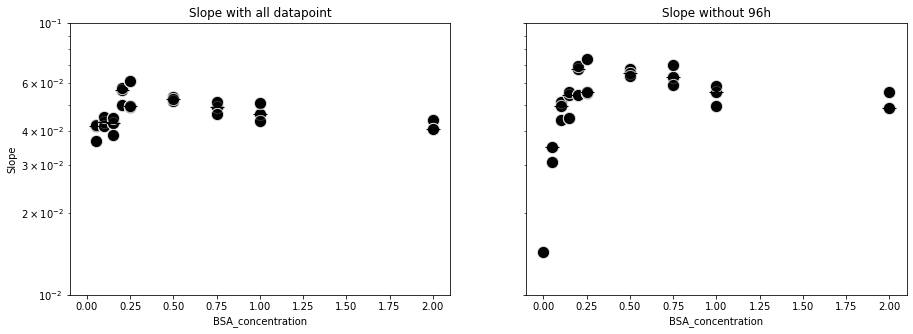

In [29]:
BSA_concentrations_slope = pd.concat([BSA_concentrations_0, BSA_concentrations_005, BSA_concentrations_01, BSA_concentrations_015, BSA_concentrations_02, BSA_concentrations_025, BSA_concentrations_05, BSA_concentrations_075, BSA_concentrations_1, BSA_concentrations_2])   
BSA_concentrations_slope_96 = pd.concat([BSA_concentrations_0_96, BSA_concentrations_005_96, BSA_concentrations_01_96, BSA_concentrations_015_96, BSA_concentrations_02_96, BSA_concentrations_025_96, BSA_concentrations_05_96, BSA_concentrations_075_96, BSA_concentrations_1_96, BSA_concentrations_2_96])
BSA_concentrations_slope_m = BSA_concentrations_slope.groupby(['BSA_concentration']).median()
BSA_concentrations_slope_96_m = BSA_concentrations_slope_96.groupby(['BSA_concentration']).median()


fig, axs = plt.subplots(1,2, figsize=(15, 5), sharey=True)
sns.scatterplot(x='BSA_concentration', y='Slope', data=BSA_concentrations_slope, s=150, alpha= 0.75, color='Black', ax=axs[0])
sns.scatterplot(x='BSA_concentration', y='Slope', data=BSA_concentrations_slope_m, s=200, marker='_', color='Black', ax=axs[0])
sns.scatterplot(x='BSA_concentration', y='Slope', data=BSA_concentrations_slope_96, s=150, alpha= 0.75, color='Black', ax=axs[1])
sns.scatterplot(x='BSA_concentration', y='Slope', data=BSA_concentrations_slope_96_m, s=200, marker='_', color='Black', ax=axs[1])

axs[0].set_title('Slope with all datapoint')
axs[1].set_title('Slope without 96h')

axs[0].set_ylim(0.01, 0.1)
axs[1].set_ylim(0.01, 0.1)

axs[0].set_yscale('log')
axs[1].set_yscale('log')

plt.savefig("/cluster/nrsw_lab/2392267/Figures/BSA_concentrations_5.png", dpi = 300)
plt.savefig("/cluster/nrsw_lab/2392267/Figures/BSA_concentrations_5.svg", dpi = 300)
BSA_concentrations_slope_96.to_csv("/cluster/nrsw_lab/2392267/Data/Growth_BSA_concentrations_2.csv")
plt.show()

In [17]:
#STATISTICS SLOPE ALL DATAPOINTS
BSA_concentrations_slope = BSA_concentrations_slope[BSA_concentrations_slope['BSA_concentration'] >0]
#ANOVA test 
res = stat()
res.anova_stat(df=BSA_concentrations_slope, res_var='Slope', anova_model='Slope ~ C(BSA_concentration)')
res.anova_summary

,df,sum_sq,mean_sq,F,PR(>F)
C(BSA_concentration),8.0,0.002900,0.000363,41.091974,3.653104e-28
Residual,99.0,0.000873,0.000009,NaN,NaN


In [18]:
#STATISTICS SLOPE WITHOUT 96H
BSA_concentrations_slope_96 = BSA_concentrations_slope_96[BSA_concentrations_slope_96['BSA_concentration'] >0]
#ANOVA test 
res = stat()
res.anova_stat(df=BSA_concentrations_slope_96, res_var='Slope', anova_model='Slope ~ C(BSA_concentration)')
res.anova_summary

,df,sum_sq,mean_sq,F,PR(>F)
C(BSA_concentration),8.0,0.007675,0.000959,37.235537,1.261761e-22
Residual,72.0,0.001855,0.000026,NaN,NaN


In [19]:
#STATISTICS SLOPE WITHOUT 96H
BSA_concentrations_slope_96 = BSA_concentrations_slope_96[BSA_concentrations_slope_96['BSA_concentration'] >0]
#Multiple pairwise comparison
res = stat()
res.tukey_hsd(df=BSA_concentrations_slope_96, res_var='Slope', xfac_var='BSA_concentration', anova_model='Slope ~ C(BSA_concentration)')
res.tukey_summary

/cluster/nrsw_lab/2392267/conda/envs/my_env/lib/python3.9/site-packages/bioinfokit/analys.py:402: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  mult_group[ele] = df[df[xfac_var] == ele].mean().loc[res_var]


,group1,group2,Diff,Lower,Upper,q-value,p-value
0,0.05,0.10,0.014651,0.006999,0.022303,8.659103,0.001000
1,0.05,0.15,0.017987,0.010335,0.025639,10.630635,0.001000
2,0.05,0.20,0.030177,0.022525,0.037829,17.834878,0.001000
3,0.05,0.25,0.028068,0.020416,0.035720,16.588587,0.001000
4,0.05,0.50,0.032232,0.024580,0.039884,19.049546,0.001000
5,0.05,0.75,0.030503,0.022851,0.038155,18.027355,0.001000
6,0.05,1.00,0.021055,0.013403,0.028707,12.443815,0.001000
7,0.05,2.00,0.017414,0.009762,0.025066,10.291972,0.001000
8,0.10,0.15,0.003336,-0.004316,0.010988,1.971532,0.898205
9,0.10,0.20,0.015526,0.007874,0.023178,9.175775,0.001000


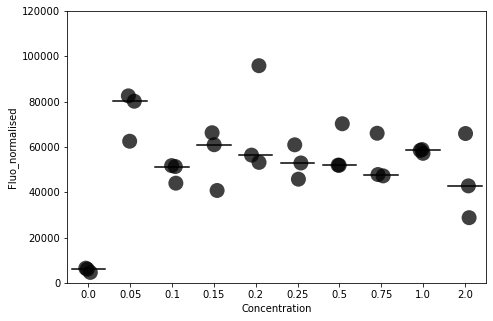

In [20]:
#IMPORT DATA
exoprotease_activity = pd.read_csv("/cluster/nrsw_lab/2392267/Data/Protease-activity_MSbg.csv")

#NORMALISATION OF EXO ACTIVITY BASED ON YIELD OF GROWTH

Fluo_norm = []
for index, row in exoprotease_activity.iterrows():
    if row['Concentration'] == 0:
        Fluo_norm.append(row['Fluo_intensity'])
    else:
        Fluo = row['Fluo_intensity']
        Yield = row['Yield_48h']
        Fluo_norm.append(Fluo/Yield)
    
exoprotease_activity['Fluo_normalised'] = Fluo_norm

#VISUALISATION 

fig, axs = plt.subplots(1, 1, figsize=(7.5,5), sharey=False)
sns.boxplot(x='Concentration', y='Fluo_normalised', data=exoprotease_activity, whis=0, showbox=False, showcaps=False, showfliers=False, color='Black')
sns.stripplot(x='Concentration', y='Fluo_normalised', data=exoprotease_activity, s=15, alpha=0.75, color='black')
plt.ylim(0,120000)

plt.savefig("/cluster/nrsw_lab/2392267/Figures/Proteases_activity_1.png", dpi = 300)
plt.savefig("/cluster/nrsw_lab/2392267/Figures/Proteases_activity_1.svg", dpi = 300)
exoprotease_activity.to_csv("/cluster/nrsw_lab/2392267/Data/Protease-activity_MSbg_2.csv")

plt.show()

In [21]:
#STATISTICS
#Multiple pairwise comparison
res = stat()
res.tukey_hsd(df=exoprotease_activity, res_var='Fluo_normalised', xfac_var='Concentration', anova_model='Fluo_normalised ~ C(Concentration)')
res.tukey_summary

/cluster/nrsw_lab/2392267/conda/envs/my_env/lib/python3.9/site-packages/bioinfokit/analys.py:402: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  mult_group[ele] = df[df[xfac_var] == ele].mean().loc[res_var]


,group1,group2,Diff,Lower,Upper,q-value,p-value
0,0.00,0.05,69393.805195,33718.484779,105069.125610,9.741053,0.001000
1,0.00,0.10,43337.596491,7662.276076,79012.916907,6.083451,0.010047
2,0.00,0.15,50313.351852,14638.031436,85988.672267,7.062663,0.002215
3,0.00,0.20,62788.571150,27113.250735,98463.891565,8.813853,0.001000
4,0.00,0.25,47516.964427,11841.644012,83192.284842,6.670124,0.004065
5,0.00,0.50,52342.732323,16667.411908,88018.052739,7.347534,0.001425
6,0.00,0.75,48003.226044,12327.905629,83678.546460,6.738382,0.003659
7,0.00,1.00,52468.722944,16793.402528,88144.043359,7.365220,0.001385
8,0.00,2.00,40142.240264,4466.919849,75817.560680,5.634908,0.019860
9,0.05,0.10,26056.208704,-9619.111712,61731.529119,3.657602,0.285282


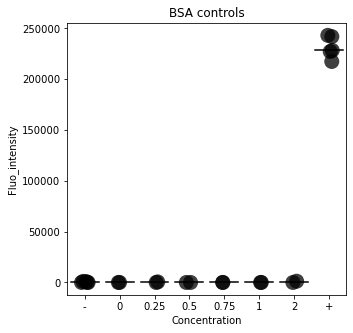

In [22]:
#SUPLEMENTARY

#IMPORT DATA
controls = pd.read_csv("/cluster/nrsw_lab/2392267/Data/Protease-activity_controls.csv")

#REMOVING BLANK VALUE FROM FLUO INTENSITY
blank = controls.groupby('Concentration').mean().loc['-','Fluo_intensity']     
for index, row in controls.iterrows():
    if controls.loc[index,'Fluo_intensity'] - blank <= 0:
        controls.loc[index,'Fluo_intensity'] = 0
    else:
        controls.loc[index,'Fluo_intensity'] = controls.loc[index,'Fluo_intensity'] - blank
        
#VISUALISATION OF THE CONTROLS AND MSGG DATA

fig, axs = plt.subplots(1,1, figsize=(5,5), sharey=False)

sns.boxplot(x='Concentration', y='Fluo_intensity', data=controls, whis=0, showbox=False, showcaps=False, showfliers=False, color='Black')
sns.stripplot(x='Concentration', y='Fluo_intensity', data=controls, s=15, alpha=0.75,  color='black')
plt.title('BSA controls')

plt.savefig("/cluster/nrsw_lab/2392267/Figures/Proteases_activity_2.png", dpi = 300)
plt.savefig("/cluster/nrsw_lab/2392267/Figures/Proteases_activity_2.svg", dpi = 300)
plt.show()

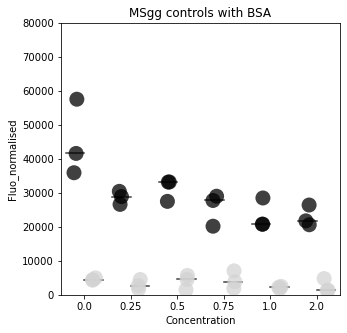

In [23]:
#SUPLEMENTARY

#IMPORT DATA
controls_2 = pd.read_csv("/cluster/nrsw_lab/2392267/Data/Protease-activity_MSgg.csv")

Fluo_norm = []
for index, row in controls_2.iterrows():
    if row['Concentration'] == 0:
        Fluo_norm.append(row['Fluo_intensity'])
    else:
        Fluo = row['Fluo_intensity']
        Yield = row['Yield']
        Fluo_norm.append(Fluo/Yield)
    
controls_2['Fluo_normalised'] = Fluo_norm
        
#VISUALISATION OF THE CONTROLS AND MSGG DATA

fig, axs = plt.subplots(1,1, figsize=(5,5), sharey=False)

sns.boxplot(x='Concentration', y='Fluo_normalised', hue='Strain', data=controls_2, whis=0, showbox=False, showcaps=False, showfliers=False)
sns.stripplot(x='Concentration', y='Fluo_normalised', hue='Strain', data=controls_2, dodge=True, s=15, alpha=0.75, palette=['black', 'lightgrey'])
plt.title('MSgg controls with BSA')
plt.ylim(0,80000)
plt.legend('',frameon=False)

plt.savefig("/cluster/nrsw_lab/2392267/Figures/Proteases_activity_3.png", dpi = 300)
plt.savefig("/cluster/nrsw_lab/2392267/Figures/Proteases_activity_3.svg", dpi = 300)
plt.show()

## Extracellular proteases are public goods

In [35]:
#IMPORT DATA
transwell_intensity_MSgg = pd.read_csv("/cluster/nrsw_lab/2392267/Data/TranswellIntensity_MSgg.csv")
transwell_intensity_MSbg = pd.read_csv("/cluster/nrsw_lab/2392267/Data/TranswellIntensity_MSbg.csv")

#DIVINDING THE DATASETS
transwell_intensity_MSgg_2 = transwell_intensity_MSgg[(transwell_intensity_MSgg['Annotation'] == 'WT-mKate2/WT-GFP')|(transwell_intensity_MSgg['Annotation'] == 'D8-mKate2/D8-GFP')|(transwell_intensity_MSgg['Annotation'] == 'D8-mKate2/WT-GFP')|(transwell_intensity_MSgg['Annotation'] == 'WT-mKate2/D8-GFP')]
transwell_intensity_MSgg_2r = transwell_intensity_MSgg[(transwell_intensity_MSgg['Annotation'] == 'WT-GFP/WT-mKate2')|(transwell_intensity_MSgg['Annotation'] == 'D8-GFP/D8-mKate2')|(transwell_intensity_MSgg['Annotation'] == 'D8-GFP/WT-mKate2')|(transwell_intensity_MSgg['Annotation'] == 'WT-GFP/D8-mKate2')]


transwell_intensity_MSbg_2 = transwell_intensity_MSbg[(transwell_intensity_MSbg['Annotation'] == 'WT-mKate2/WT-GFP')|(transwell_intensity_MSbg['Annotation'] == 'D8-mKate2/D8-GFP')|(transwell_intensity_MSbg['Annotation'] == 'D8-mKate2/WT-GFP')|(transwell_intensity_MSgg['Annotation'] == 'WT-mKate2/D8-GFP')]
transwell_intensity_MSbg_2r = transwell_intensity_MSbg[(transwell_intensity_MSbg['Annotation'] == 'WT-GFP/WT-mKate2')|(transwell_intensity_MSbg['Annotation'] == 'D8-GFP/D8-mKate2')|(transwell_intensity_MSbg['Annotation'] == 'D8-GFP/WT-mKate2')|(transwell_intensity_MSgg['Annotation'] == 'WT-GFP/D8-mKate2')]
transwell_intensity_MSbg_3 = transwell_intensity_MSbg_2[transwell_intensity_MSbg_2['Day'] == 9]
transwell_intensity_MSbg_3r = transwell_intensity_MSbg_2r[transwell_intensity_MSbg_2r['Day'] == 9]

#ORDERING CONDITIONS
order_1 = []
for index, row in transwell_intensity_MSgg_2.iterrows():
    if row['Annotation'] == 'WT-mKate2/WT-GFP':
        order_1.append(1)
    elif row['Annotation'] == 'D8-mKate2/D8-GFP':
        order_1.append(2)
    elif row['Annotation'] == 'D8-mKate2/WT-GFP':
        order_1.append(3)
    elif row['Annotation'] == 'WT-mKate2/D8-GFP':
        order_1.append(4)
transwell_intensity_MSgg_2['Order'] = order_1

order_2 = []
for index, row in transwell_intensity_MSgg_2r.iterrows():
    if row['Annotation'] == 'WT-GFP/WT-mKate2':
        order_2.append(1)
    elif row['Annotation'] == 'D8-GFP/D8-mKate2':
        order_2.append(2)
    elif row['Annotation'] == 'D8-GFP/WT-mKate2':
        order_2.append(3)
    elif row['Annotation'] == 'WT-GFP/D8-mKate2':
        order_2.append(4)
transwell_intensity_MSgg_2r['Order'] = order_2

order_3 = []
for index, row in transwell_intensity_MSbg_3.iterrows():
    if row['Annotation'] == 'WT-mKate2/WT-GFP':
        order_3.append(1)
    elif row['Annotation'] == 'D8-mKate2/D8-GFP':
        order_3.append(2)
    elif row['Annotation'] == 'D8-mKate2/WT-GFP':
        order_3.append(3)
    elif row['Annotation'] == 'WT-mKate2/D8-GFP':
        order_3.append(4)
transwell_intensity_MSbg_3['Order'] = order_3

order_4 = []
for index, row in transwell_intensity_MSbg_3r.iterrows():
    if row['Annotation'] == 'WT-GFP/WT-mKate2':
        order_4.append(1)
    elif row['Annotation'] == 'D8-GFP/D8-mKate2':
        order_4.append(2)
    elif row['Annotation'] == 'D8-GFP/WT-mKate2':
        order_4.append(3)
    elif row['Annotation'] == 'WT-GFP/D8-mKate2':
        order_4.append(4)
transwell_intensity_MSbg_3r['Order'] = order_4

/tmp/667844.1.priority.q/ipykernel_22056/23346800.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  transwell_intensity_MSgg_2['Order'] = order_1
/tmp/667844.1.priority.q/ipykernel_22056/23346800.py:38: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  transwell_intensity_MSgg_2r['Order'] = order_2


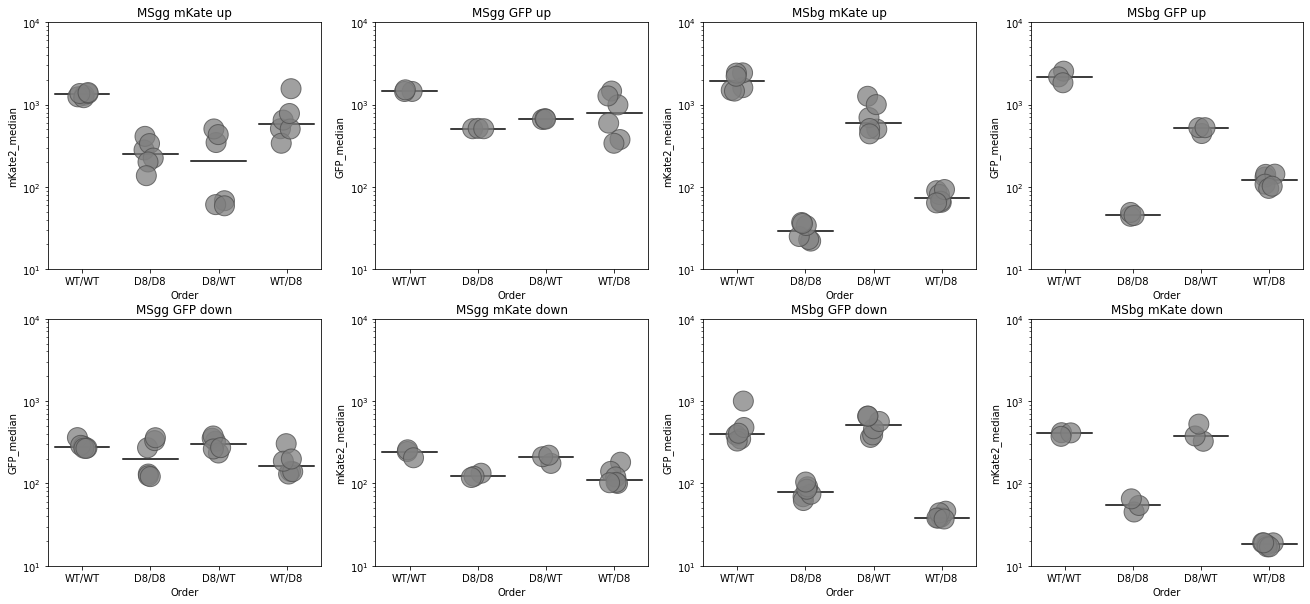

In [36]:
#VISUALISATION OF MSGG AND MSBG TRANSWELL
fig, axs = plt.subplots(2,4, figsize=(22.5,10), sharey=False)

sns.boxplot(x='Order', y='mKate2_median', data=transwell_intensity_MSgg_2, whis=0, showbox=False, showcaps=False, showfliers=False, color='Black', ax=axs[0,0])
sns.stripplot(x='Order', y='mKate2_median', data=transwell_intensity_MSgg_2, s=20, linewidth=1, jitter=True, palette=['grey','grey','grey','grey'], alpha=0.75, ax=axs[0,0])

sns.boxplot(x='Order', y='GFP_median', data=transwell_intensity_MSgg_2r, whis=0, showbox=False, showcaps=False, showfliers=False, color='Black', ax=axs[0,1])
sns.stripplot(x='Order', y='GFP_median', data=transwell_intensity_MSgg_2r, s=20, linewidth=1, jitter=True, palette=['grey','grey','grey','grey'], alpha=0.75, ax=axs[0,1])

sns.boxplot(x='Order', y='mKate2_median', data=transwell_intensity_MSbg_3, whis=0, showbox=False, showcaps=False, showfliers=False, color='Black', ax=axs[0,2])
sns.stripplot(x='Order', y='mKate2_median', data=transwell_intensity_MSbg_3, s=20, linewidth=1, jitter=True, palette=['grey','grey','grey','grey'], alpha=0.75, ax=axs[0,2])

sns.boxplot(x='Order', y='GFP_median', data=transwell_intensity_MSbg_3r, whis=0, showbox=False, showcaps=False, showfliers=False, color='Black', ax=axs[0,3])
sns.stripplot(x='Order', y='GFP_median', data=transwell_intensity_MSbg_3r, s=20, linewidth=1, jitter=True, palette=['grey','grey','grey','grey'], alpha=0.75, ax=axs[0,3])

axs[0,0].set_ylim(10,10000)
axs[0,1].set_ylim(10,10000)
axs[0,2].set_ylim(10,10000)
axs[0,3].set_ylim(10,10000)

axs[0,0].set_yscale('log')
axs[0,1].set_yscale('log')
axs[0,2].set_yscale('log')
axs[0,3].set_yscale('log')

labels = ['WT/WT','D8/D8','D8/WT','WT/D8']
axs[0,0].set_xticklabels(labels)
axs[0,1].set_xticklabels(labels)
axs[0,2].set_xticklabels(labels)
axs[0,3].set_xticklabels(labels)

axs[0,0].set_title('MSgg mKate up')
axs[0,1].set_title('MSgg GFP up')
axs[0,2].set_title('MSbg mKate up')
axs[0,3].set_title('MSbg GFP up')

sns.boxplot(x='Order', y='GFP_median', data=transwell_intensity_MSgg_2, whis=0, showbox=False, showcaps=False, showfliers=False, color='Black', ax=axs[1,0])
sns.stripplot(x='Order', y='GFP_median', data=transwell_intensity_MSgg_2, s=20, linewidth=1, jitter=True, palette=['grey','grey','grey','grey'], alpha=0.75, ax=axs[1,0])

sns.boxplot(x='Order', y='mKate2_median', data=transwell_intensity_MSgg_2r, whis=0, showbox=False, showcaps=False, showfliers=False, color='Black', ax=axs[1,1])
sns.stripplot(x='Order', y='mKate2_median', data=transwell_intensity_MSgg_2r, s=20, linewidth=1, jitter=True, palette=['grey','grey','grey','grey'], alpha=0.75, ax=axs[1,1])

sns.boxplot(x='Order', y='GFP_median', data=transwell_intensity_MSbg_3, whis=0, showbox=False, showcaps=False, showfliers=False, color='Black', ax=axs[1,2])
sns.stripplot(x='Order', y='GFP_median', data=transwell_intensity_MSbg_3, s=20, linewidth=1, jitter=True, palette=['grey','grey','grey'], alpha=0.75, ax=axs[1,2])

sns.boxplot(x='Order', y='mKate2_median', data=transwell_intensity_MSbg_3r, whis=0, showbox=False, showcaps=False, showfliers=False, color='Black', ax=axs[1,3])
sns.stripplot(x='Order', y='mKate2_median', data=transwell_intensity_MSbg_3r, s=20, linewidth=1, jitter=True, palette=['grey','grey','grey'], alpha=0.75, ax=axs[1,3])

axs[1,0].set_ylim(10,10000)
axs[1,1].set_ylim(10,10000)
axs[1,2].set_ylim(10,10000)
axs[1,3].set_ylim(10,10000)

axs[1,0].set_yscale('log')
axs[1,1].set_yscale('log')
axs[1,2].set_yscale('log')
axs[1,3].set_yscale('log')

axs[1,0].set_xticklabels(labels)
axs[1,1].set_xticklabels(labels)
axs[1,2].set_xticklabels(labels)
axs[1,3].set_xticklabels(labels)

axs[1,0].set_title('MSgg GFP down')
axs[1,1].set_title('MSgg mKate down')
axs[1,2].set_title('MSbg GFP down')
axs[1,3].set_title('MSbg mKate down')

plt.savefig("/cluster/nrsw_lab/2392267/Figures/Transwell_MSgg-MSbg.png", dpi = 300)
plt.savefig("/cluster/nrsw_lab/2392267/Figures/Transwell_MSgg-MSbg.svg", dpi = 300)
plt.show()

In [37]:
#STATISTICAL ANALYSIS
#ANOVA test
res = stat()
res.anova_stat(df=transwell_intensity_MSgg_2, res_var='mKate2_median', anova_model='GFP_median ~ C(Order)')
res.anova_summary

,df,sum_sq,mean_sq,F,PR(>F)
C(Order),3.0,58327.458333,19442.486111,3.696589,0.028882
Residual,20.0,105191.500000,5259.575000,NaN,NaN


In [38]:
#STATISTICAL ANALYSIS
#ANOVA test
res = stat()
res.anova_stat(df=transwell_intensity_MSgg_2r, res_var='GFP_median', anova_model='GFP_median ~ C(Order)')
res.anova_summary

,df,sum_sq,mean_sq,F,PR(>F)
C(Order),3.0,1.578001e+06,526000.355556,5.156272,0.018144
Residual,11.0,1.122129e+06,102011.757576,NaN,NaN


In [39]:
#STATISTICAL ANALYSIS
#ANOVA test
res = stat()
res.anova_stat(df=transwell_intensity_MSbg_3, res_var='mKate2_median', anova_model='GFP_median ~ C(Order)')
res.anova_summary

,df,sum_sq,mean_sq,F,PR(>F)
C(Order),3.0,1.180159e+06,393386.375000,19.13219,0.000004
Residual,20.0,4.112298e+05,20561.491667,NaN,NaN


In [40]:
#STATISTICAL ANALYSIS
#ANOVA test
res = stat()
res.anova_stat(df=transwell_intensity_MSbg_3r, res_var='GFP_median', anova_model='GFP_median ~ C(Order)')
res.anova_summary

,df,sum_sq,mean_sq,F,PR(>F)
C(Order),3.0,9858072.9,3.286024e+06,142.381292,4.412376e-09
Residual,11.0,253869.5,2.307905e+04,NaN,NaN


In [37]:
transwell_intensity_MSbg_2 = transwell_intensity_MSbg_2[(transwell_intensity_MSbg_2['Annotation'] != 'D8-GFP/blank')&(transwell_intensity_MSbg_2['Annotation'] != 'D8-mKate2/blank')]
transwell_intensity_MSbg_2.head(50)

,Day,pellicle,up,down,GFP_min,GFP_max,GFP_mean,GFP_median,mKate2_min,mKate2_max,mKate2_mean,mKate2_median,Annotation,Replicate,Order,Hue,Fluo_intensity
0,9,NaN,WT-mKate2,WT-GFP,322,1166,1623.951000,1623.951000,501,4095,1513.020000,1604.000000,WT-mKate2/WT-GFP,1,1,1,1604.0
1,9,NaN,WT-mKate2,WT-GFP,287,939,1202.896333,1202.896333,512,4095,1468.825000,1493.000000,WT-mKate2/WT-GFP,2,1,1,1493.0
2,9,NaN,WT-mKate2,WT-GFP,245,801,1473.510000,1473.510000,317,4095,1411.768000,1457.000000,WT-mKate2/WT-GFP,3,1,1,1457.0
3,9,NaN,D8-mKate2,D8-GFP,29,338,52.223000,52.223000,5,592,22.660000,22.000000,D8-mKate2/D8-GFP,1,2,1,22.0
4,9,NaN,D8-mKate2,D8-GFP,25,374,40.805667,40.805667,6,437,23.743000,23.000000,D8-mKate2/D8-GFP,2,2,1,23.0
5,9,NaN,D8-mKate2,D8-GFP,29,346,46.429667,46.429667,4,578,25.335000,25.000000,D8-mKate2/D8-GFP,3,2,1,25.0
6,9,NaN,D8-mKate2,WT-GFP,299,727,1337.649000,1337.649000,72,2690,519.064000,503.000000,D8-mKate2/WT-GFP,1,3,1,503.0
7,9,NaN,D8-mKate2,WT-GFP,313,678,1361.002000,1361.002000,94,4095,732.301000,695.000000,D8-mKate2/WT-GFP,2,3,1,695.0
8,9,NaN,D8-mKate2,WT-GFP,354,1032,1614.143000,1614.143000,104,4095,572.435000,512.000000,D8-mKate2/WT-GFP,3,3,1,512.0
9,9,NaN,WT-mKate2,WT-GFP,344,1244,1528.991667,1528.991667,782,4095,2387.000000,2426.000000,WT-mKate2/WT-GFP,4,1,1,2426.0


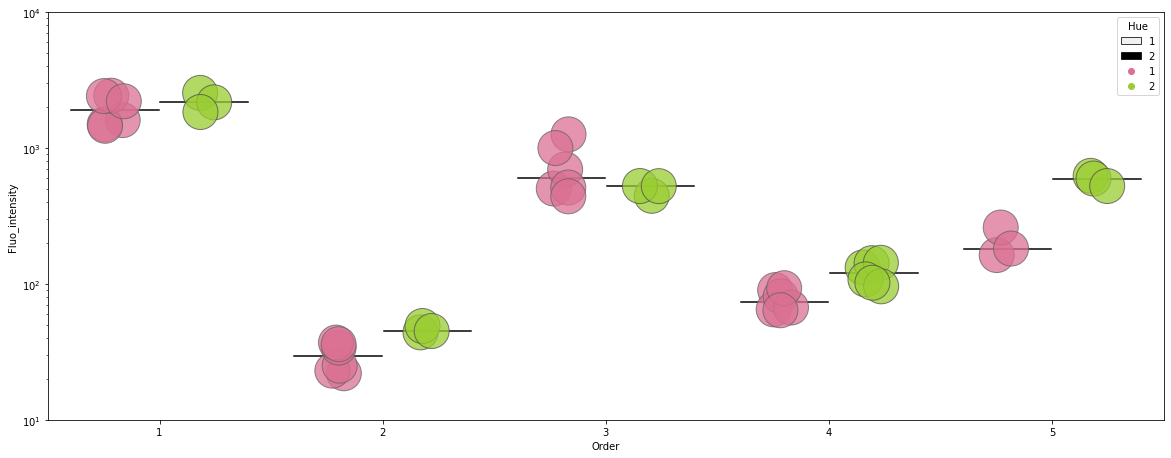

In [38]:
#IMPORT DATA
transwell_intensity_MSbg = pd.read_csv(r"C:\Users\Thibault Rosazza\OneDrive - University of Dundee\Documents\_PhD_\Code\Jupyter_Notebooks\Data\TranswellIntensity_MSbg.csv")
transwell_intensity_blank = transwell_intensity_MSbg[transwell_intensity_MSbg['Annotation'] == 'blank/blank']
transwell_intensity_MSbg_2 = transwell_intensity_MSbg[transwell_intensity_MSbg['Annotation'] != 'blank/blank']

blank_GFP = transwell_intensity_blank['GFP_median'].mean()+(2*transwell_intensity_blank['GFP_median'].std())
blank_mKate = transwell_intensity_blank['mKate2_median'].mean()+(2*transwell_intensity_blank['mKate2_median'].std())

transwell_intensity_MSbg_2['GFP_median'] - blank_GFP
transwell_intensity_MSbg_2['mKate2_median'] - blank_mKate

transwell_intensity_MSbg_2 = transwell_intensity_MSbg_2[(transwell_intensity_MSbg_2['Annotation'] != 'D8-GFP/blank')&(transwell_intensity_MSbg_2['Annotation'] != 'D8-mKate2/blank')]

#ORDERING CONDITIONS
order_1 = []
hue_1 = []
fluo_intensity_1 =[]
for index, row in transwell_intensity_MSbg_2.iterrows():
    if row['Annotation'] == 'WT-mKate2/WT-GFP':
        order_1.append(1)
        hue_1.append(1)
        fluo_intensity_1.append(row['mKate2_median'])
    elif row['Annotation'] == 'WT-GFP/WT-mKate2':
        order_1.append(1)
        hue_1.append(2)
        fluo_intensity_1.append(row['GFP_median'])
    elif row['Annotation'] == 'D8-mKate2/D8-GFP':
        order_1.append(2)
        hue_1.append(1)
        fluo_intensity_1.append(row['mKate2_median'])
    elif row['Annotation'] == 'D8-GFP/D8-mKate2':
        order_1.append(2)
        hue_1.append(2)
        fluo_intensity_1.append(row['GFP_median'])
    elif row['Annotation'] == 'D8-mKate2/WT-GFP':
        order_1.append(3)
        hue_1.append(1)
        fluo_intensity_1.append(row['mKate2_median'])
    elif row['Annotation'] == 'D8-GFP/WT-mKate2':
        order_1.append(3)
        hue_1.append(2)
        fluo_intensity_1.append(row['GFP_median'])
    elif row['Annotation'] == 'WT-mKate2/D8-GFP':
        order_1.append(4)
        hue_1.append(1)
        fluo_intensity_1.append(row['mKate2_median'])
    elif row['Annotation'] == 'WT-GFP/D8-mKate2':
        order_1.append(4)
        hue_1.append(2)
        fluo_intensity_1.append(row['GFP_median'])
    elif row['Annotation'] == 'WT-mKate2/blank':
        order_1.append(5)
        hue_1.append(1)
        fluo_intensity_1.append(row['mKate2_median'])
    elif row['Annotation'] == 'WT-GFP/blank':
        order_1.append(5)
        hue_1.append(2)
        fluo_intensity_1.append(row['GFP_median'])        
transwell_intensity_MSbg_2['Order'] = order_1
transwell_intensity_MSbg_2['Hue'] = hue_1
transwell_intensity_MSbg_2['Fluo_intensity'] = fluo_intensity_1
transwell_intensity_MSbg_2 = transwell_intensity_MSbg_2.dropna(subset=['Order'])

fig, axs = plt.subplots(1,1, figsize=(20,7.5), sharey=False)

sns.boxplot(x='Order', y='Fluo_intensity', hue='Hue', data=transwell_intensity_MSbg_2, whis=0, showbox=False, showcaps=False, showfliers=False, color='Black')
sns.stripplot(x='Order', y='Fluo_intensity', hue='Hue', data=transwell_intensity_MSbg_2, dodge=True, s=35, linewidth=1, jitter=True, palette=['palevioletred','yellowgreen'], alpha=0.75)

plt.yscale('log')
plt.ylim(10,10000)

plt.savefig(r"C:\Users\Thibault Rosazza\OneDrive - University of Dundee\Documents\_PhD_\Code\Jupyter_Notebooks\Figure\Transwell_MSbg.png", dpi = 300)
plt.savefig(r"C:\Users\Thibault Rosazza\OneDrive - University of Dundee\Documents\_PhD_\Code\Jupyter_Notebooks\Figure\Transwell_MSbg.svg", dpi = 300)
plt.show()

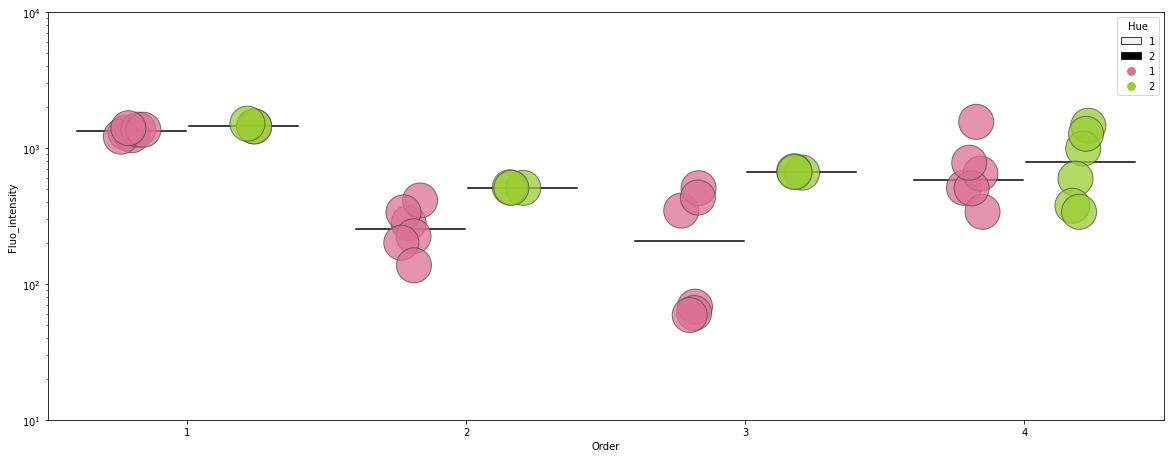

In [93]:
#IMPORT DATA
transwell_intensity_MSgg = pd.read_csv(r"C:\Users\Thibault Rosazza\OneDrive - University of Dundee\Documents\_PhD_\Code\Jupyter_Notebooks\Data\TranswellIntensity_MSgg.csv")

transwell_intensity_MSgg['GFP_median'] - blank_GFP
transwell_intensity_MSgg['mKate2_median'] - blank_mKate

#ORDERING CONDITIONS
order_2 = []
hue_2 = []
fluo_intensity_2 =[]
for index, row in transwell_intensity_MSgg.iterrows():
    if row['Annotation'] == 'WT-mKate2/WT-GFP':
        order_2.append(1)
        hue_2.append(1)
        fluo_intensity_2.append(row['mKate2_median'])
    elif row['Annotation'] == 'WT-GFP/WT-mKate2':
        order_2.append(1)
        hue_2.append(2)
        fluo_intensity_2.append(row['GFP_median'])
    elif row['Annotation'] == 'D8-mKate2/D8-GFP':
        order_2.append(2)
        hue_2.append(1)
        fluo_intensity_2.append(row['mKate2_median'])
    elif row['Annotation'] == 'D8-GFP/D8-mKate2':
        order_2.append(2)
        hue_2.append(2)
        fluo_intensity_2.append(row['GFP_median'])
    elif row['Annotation'] == 'D8-mKate2/WT-GFP':
        order_2.append(3)
        hue_2.append(1)
        fluo_intensity_2.append(row['mKate2_median'])
    elif row['Annotation'] == 'D8-GFP/WT-mKate2':
        order_2.append(3)
        hue_2.append(2)
        fluo_intensity_2.append(row['GFP_median'])
    elif row['Annotation'] == 'WT-mKate2/D8-GFP':
        order_2.append(4)
        hue_2.append(1)
        fluo_intensity_2.append(row['mKate2_median'])
    elif row['Annotation'] == 'WT-GFP/D8-mKate2':
        order_2.append(4)
        hue_2.append(2)
        fluo_intensity_2.append(row['GFP_median'])
        
transwell_intensity_MSgg['Order'] = order_2
transwell_intensity_MSgg['Hue'] = hue_2
transwell_intensity_MSgg['Fluo_intensity'] = fluo_intensity_2

fig, axs = plt.subplots(1,1, figsize=(20,7.5), sharey=False)

sns.boxplot(x='Order', y='Fluo_intensity', hue='Hue', data=transwell_intensity_MSgg, whis=0, showbox=False, showcaps=False, showfliers=False, color='Black')
sns.stripplot(x='Order', y='Fluo_intensity', hue='Hue', data=transwell_intensity_MSgg, dodge=True, s=35, linewidth=1, jitter=True, palette=['palevioletred','yellowgreen'], alpha=0.75)

plt.yscale('log')
plt.ylim(10,10000)

plt.savefig(r"C:\Users\Thibault Rosazza\OneDrive - University of Dundee\Documents\_PhD_\Code\Jupyter_Notebooks\Figure\Transwell_MSgg.png", dpi = 300)
plt.savefig(r"C:\Users\Thibault Rosazza\OneDrive - University of Dundee\Documents\_PhD_\Code\Jupyter_Notebooks\Figure\Transwell_MSgg.svg", dpi = 300)
plt.show()

## Investigation of the public good dilemma

In [11]:
#IMPORT MSgg DATA 
CFU_msgg = pd.read_csv("/cluster/nrsw_lab/2392267/Data/CFU_coculture_MSgg_merge.csv")

#CFU/ML CALCULATION
CFU_WT = []
CFU_D8 = []
CFU_WT_D8 = []

for index, row in CFU_msgg.iterrows():
    Count_WT = row['Count_NCIB3610']
    Count_D8 = row['Count_NRS5645']
    Count_WT_D8 = row['Count_Tot']
    Dilution = row['Dilution']
    CFU_WT.append((Count_WT/Dilution)*10)
    CFU_D8.append((Count_D8/Dilution)*10)
    CFU_WT_D8.append((Count_WT_D8/Dilution)*10)

CFU_msgg['CFU_Tot'] = CFU_WT_D8
CFU_msgg['CFU_NCIB3610'] = CFU_WT
CFU_msgg['CFU_NRS5645'] = CFU_D8


#CFU PROPORTION CALCULATION

Prop_CFU_WT =[]
Prop_CFU_D8 =[]


for index, row in CFU_msgg.iterrows():
    CFU_Tot = row['CFU_Tot']
    CFU_WT = row['CFU_NCIB3610']
    CFU_D8 = row['CFU_NRS5645']
    
    Prop_CFU_WT.append((CFU_WT/CFU_Tot)*100)
    Prop_CFU_D8.append((CFU_D8/CFU_Tot)*100)

    
CFU_msgg['%NCIB3610_CFU_24'] = Prop_CFU_WT
CFU_msgg['%NCIB3610_CFU_24'] = CFU_msgg['%NCIB3610_CFU_24'].astype(float)
CFU_msgg['%NRS5645_CFU_24'] = Prop_CFU_D8
CFU_msgg['%NRS5645_CFU_24'] = CFU_msgg['%NRS5645_CFU_24'].astype(float)

CFU_msgg.head()

,Timepoint,Medium,%_NCIB3610,%_NRS5645,Dilution,Heat_treatment,Count_Tot,Count_NCIB3610,Count_NRS5645,CFU_Tot,CFU_NCIB3610,CFU_NRS5645,%NCIB3610_CFU_24,%NRS5645_CFU_24
0,24,MSbg,100,0,1.000000e-07,0,20,20,0,2.000000e+09,2.000000e+09,0.0,100.000000,0.000000
1,24,MSbg,100,0,1.000000e-07,0,26,26,0,2.600000e+09,2.600000e+09,0.0,100.000000,0.000000
2,24,MSbg,100,0,1.000000e-07,0,16,16,0,1.600000e+09,1.600000e+09,0.0,100.000000,0.000000
3,24,MSbg,75,25,1.000000e-07,0,17,12,5,1.700000e+09,1.200000e+09,500000000.0,70.588235,29.411765
4,24,MSbg,75,25,1.000000e-07,0,31,28,3,3.100000e+09,2.800000e+09,300000000.0,90.322581,9.677419


In [12]:
#IMPORT MSbg DATA 
CFU_msbg = pd.read_csv("/cluster/nrsw_lab/2392267/Data/CFU_coculture_MSbg_merge.csv")

#CFU/ML CALCULATION
CFU_WT = []
CFU_D8 = []
CFU_WT_D8 = []

for index, row in CFU_msbg.iterrows():
    Count_WT = row['Count_NCIB3610']
    Count_D8 = row['Count_NRS5645']
    Count_WT_D8 = row['Count_Tot']
    Dilution = row['Dilution']
    CFU_WT.append((Count_WT/Dilution)*10)
    CFU_D8.append((Count_D8/Dilution)*10)
    CFU_WT_D8.append((Count_WT_D8/Dilution)*10)

CFU_msbg['CFU_Tot'] = CFU_WT_D8
CFU_msbg['CFU_NCIB3610'] = CFU_WT
CFU_msbg['CFU_NRS5645'] = CFU_D8

#%SPORE CALCULATION
Spore_WT = []
Spore_D8 = []
Spore_WT_D8 = []

for index, row in CFU_msbg.iterrows():
    if row['Heat_treatment'] == 1:
        CFU_mL_HT_WT = row['CFU_NCIB3610']
        CFU_mL_noHT_WT = CFU_msbg.loc[(index-1),'CFU_NCIB3610']
        Spore_WT.append((CFU_mL_HT_WT/CFU_mL_noHT_WT)*100)
        CFU_mL_HT_D8 = row['CFU_NRS5645']
        CFU_mL_noHT_D8 = CFU_msbg.loc[(index-1),'CFU_NRS5645']
        Spore_D8.append((CFU_mL_HT_D8/CFU_mL_noHT_D8)*100)
        CFU_mL_HT_WT_D8 = row['CFU_Tot']
        CFU_mL_noHT_WT_D8 = CFU_msbg.loc[(index-1),'CFU_Tot']
        Spore_WT_D8.append((CFU_mL_HT_WT_D8/CFU_mL_noHT_WT_D8)*100)
       
    else:
        Spore_WT.append('NaN')
        Spore_D8.append('NaN')
        Spore_WT_D8.append('NaN')

CFU_msbg['Spore_Tot'] = Spore_WT_D8 
CFU_msbg['Spore_Tot'] = CFU_msbg['Spore_Tot'].astype(float)
CFU_msbg['Spore_NCIB3610'] = Spore_WT
CFU_msbg['Spore_NCIB3610'] = CFU_msbg['Spore_NCIB3610'].astype(float)
CFU_msbg['Spore_NRS5645'] = Spore_D8 
CFU_msbg['Spore_NRS5645'] = CFU_msbg['Spore_NRS5645'].astype(float)

#CFU AND SPORE PROPORTION CALCULATION

Prop_CFU_WT =[]
Prop_CFU_D8 =[]
Prop_spore_WT =[]
Prop_spore_D8 =[]

for index, row in CFU_msbg.iterrows():
    CFU_Tot = row['CFU_Tot']
    CFU_WT = row['CFU_NCIB3610']
    CFU_D8 = row['CFU_NRS5645']
    Spore_Tot = row['Spore_Tot']
    Spore_WT = row['Spore_NCIB3610']
    Spore_D8 = row['Spore_NRS5645']
    
    Prop_CFU_WT.append((CFU_WT/CFU_Tot)*100)
    Prop_CFU_D8.append((CFU_D8/CFU_Tot)*100)
    Prop_spore_WT.append((Spore_WT/Spore_Tot)*100)
    Prop_spore_D8.append((Spore_D8/Spore_Tot)*100)
    
CFU_msbg['%NCIB3610_CFU_48'] = Prop_CFU_WT
CFU_msbg['%NCIB3610_CFU_48'] = CFU_msbg['%NCIB3610_CFU_48'].astype(float)
CFU_msbg['%NRS5645_CFU_48'] = Prop_CFU_D8
CFU_msbg['%NRS5645_CFU_48'] = CFU_msbg['%NRS5645_CFU_48'].astype(float)
CFU_msbg['%NCIB3610_SPORE_48'] = Prop_spore_WT
CFU_msbg['%NCIB3610_SPORE_48'] = CFU_msbg['%NCIB3610_SPORE_48'].astype(float)
CFU_msbg['%NRS5645_SPORE_48'] = Prop_spore_D8
CFU_msbg['%NRS5645_SPORE_48'] = CFU_msbg['%NRS5645_SPORE_48'].astype(float)

CFU_msbg.head()

/tmp/673591.1.priority.q/ipykernel_8016/4175669954.py:34: RuntimeWarning: invalid value encountered in double_scalars
  Spore_D8.append((CFU_mL_HT_D8/CFU_mL_noHT_D8)*100)
/tmp/673591.1.priority.q/ipykernel_8016/4175669954.py:31: RuntimeWarning: invalid value encountered in double_scalars
  Spore_WT.append((CFU_mL_HT_WT/CFU_mL_noHT_WT)*100)


,Timepoint,%_NCIB3610,%_NRS5645,Dilution,Heat_treatment,Count_Tot,Count_NCIB3610,Count_NRS5645,CFU_Tot,CFU_NCIB3610,CFU_NRS5645,Spore_Tot,Spore_NCIB3610,Spore_NRS5645,%NCIB3610_CFU_48,%NRS5645_CFU_48,%NCIB3610_SPORE_48,%NRS5645_SPORE_48
0,6.0,100.0,0.0,0.001,0.0,590.0,590.0,0.0,5900000.0,5900000.0,0.0,NaN,NaN,NaN,100.0,0.0,NaN,NaN
1,6.0,100.0,0.0,0.001,1.0,5.0,5.0,0.0,50000.0,50000.0,0.0,0.847458,0.847458,NaN,100.0,0.0,100.0,NaN
2,6.0,100.0,0.0,0.001,0.0,742.0,742.0,0.0,7420000.0,7420000.0,0.0,NaN,NaN,NaN,100.0,0.0,NaN,NaN
3,6.0,100.0,0.0,0.001,1.0,12.0,12.0,0.0,120000.0,120000.0,0.0,1.617251,1.617251,NaN,100.0,0.0,100.0,NaN
4,6.0,100.0,0.0,0.001,0.0,404.0,404.0,0.0,4040000.0,4040000.0,0.0,NaN,NaN,NaN,100.0,0.0,NaN,NaN


In [13]:
#NORMALISATION OF %SPORE FOR NCIB3610 and NRS5645

Spore_msbg = CFU_msbg[CFU_msbg['Heat_treatment'] == 1]

Norm_Spore_WT = []
Norm_Spore_D8 = []

for index, row in Spore_msbg.iterrows():
    
    SporeWT = row['%NCIB3610_SPORE_48']
    SporeD8 = row['%NRS5645_SPORE_48']
    SporeTot = SporeWT + SporeD8
    
    if SporeWT == 100:
        Norm_Spore_WT.append(100)
        Norm_Spore_D8.append(0) 
    
    elif SporeD8 ==100:
        Norm_Spore_WT.append(0)
        Norm_Spore_D8.append(100)
    
    else:
        Norm_Spore_WT.append((SporeWT*100)/SporeTot)
        Norm_Spore_D8.append((SporeD8*100)/SporeTot)
           
Spore_msbg['%NCIB3610_SPORE_48_norm'] = Norm_Spore_WT
Spore_msbg['%NRS5645_SPORE_48_norm'] = Norm_Spore_D8

/tmp/673591.1.priority.q/ipykernel_8016/1208337266.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Spore_msbg['%NCIB3610_SPORE_48_norm'] = Norm_Spore_WT
/tmp/673591.1.priority.q/ipykernel_8016/1208337266.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Spore_msbg['%NRS5645_SPORE_48_norm'] = Norm_Spore_D8


In [14]:
#SUBDIVISION OF THE DATASET 
CFU_msgg_0 = CFU_msgg[CFU_msgg['%_NCIB3610'] == 0]
CFU_msgg_25 = CFU_msgg[CFU_msgg['%_NCIB3610'] == 25]
CFU_msgg_50 = CFU_msgg[CFU_msgg['%_NCIB3610'] == 50]
CFU_msgg_75 = CFU_msgg[CFU_msgg['%_NCIB3610'] == 75]
CFU_msgg_100 = CFU_msgg[CFU_msgg['%_NCIB3610'] == 100]

CFU_msbg_1 = CFU_msbg[CFU_msbg['Heat_treatment'] == 0]
CFU_msbg_0 = CFU_msbg_1[CFU_msbg_1['%_NCIB3610'] == 0]
CFU_msbg_25 = CFU_msbg_1[CFU_msbg_1['%_NCIB3610'] == 25]
CFU_msbg_50 = CFU_msbg_1[CFU_msbg_1['%_NCIB3610'] == 50]
CFU_msbg_75 = CFU_msbg_1[CFU_msbg_1['%_NCIB3610'] == 75]
CFU_msbg_80 = CFU_msbg_1[CFU_msbg_1['%_NCIB3610'] == 80]
CFU_msbg_85 = CFU_msbg_1[CFU_msbg_1['%_NCIB3610'] == 85]
CFU_msbg_90 = CFU_msbg_1[CFU_msbg_1['%_NCIB3610'] == 90]
CFU_msbg_95 = CFU_msbg_1[CFU_msbg_1['%_NCIB3610'] == 95]
CFU_msbg_100 = CFU_msbg_1[CFU_msbg_1['%_NCIB3610'] == 100]

CFU_msbg_0_48 = CFU_msbg_0[CFU_msbg_0['Timepoint'] == 48]
CFU_msbg_25_48 = CFU_msbg_25[CFU_msbg_25['Timepoint'] == 48]
CFU_msbg_50_48 = CFU_msbg_50[CFU_msbg_50['Timepoint'] == 48]
CFU_msbg_75_48 = CFU_msbg_75[CFU_msbg_75['Timepoint'] == 48]
CFU_msbg_85_48 = CFU_msbg_85[CFU_msbg_85['Timepoint'] == 48]
CFU_msbg_95_48 = CFU_msbg_95[CFU_msbg_95['Timepoint'] == 48]
CFU_msbg_100_48 = CFU_msbg_100[CFU_msbg_100['Timepoint'] == 48]

Spore_msbg_0 = Spore_msbg[Spore_msbg['%_NCIB3610'] == 0]
Spore_msbg_25 = Spore_msbg[Spore_msbg['%_NCIB3610'] == 25]
Spore_msbg_50 = Spore_msbg[Spore_msbg['%_NCIB3610'] == 50]
Spore_msbg_75 = Spore_msbg[Spore_msbg['%_NCIB3610'] == 75]
Spore_msbg_80 = Spore_msbg[Spore_msbg['%_NCIB3610'] == 80]
Spore_msbg_85 = Spore_msbg[Spore_msbg['%_NCIB3610'] == 85]
Spore_msbg_90 = Spore_msbg[Spore_msbg['%_NCIB3610'] == 90]
Spore_msbg_95 = Spore_msbg[Spore_msbg['%_NCIB3610'] == 95]
Spore_msbg_100 = Spore_msbg[Spore_msbg['%_NCIB3610'] == 100]

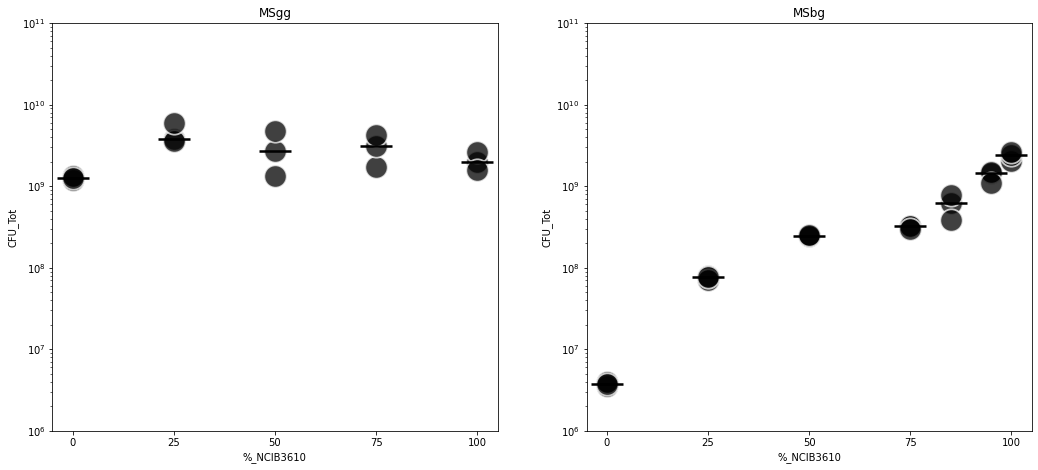

In [15]:
#VISUALISATION OF THE YIELD AT 48H
CFU_msgg_24 = pd.concat([CFU_msgg_0,CFU_msgg_25,CFU_msgg_50,CFU_msgg_75,CFU_msgg_100])
CFU_msgg_24_median = CFU_msgg_24.groupby(['%_NCIB3610']).median()

CFU_msbg_48 = pd.concat([CFU_msbg_0_48,CFU_msbg_25_48,CFU_msbg_50_48,CFU_msbg_75_48,CFU_msbg_85_48,CFU_msbg_95_48,CFU_msbg_100_48])
CFU_msbg_48_median = CFU_msbg_48.groupby(['%_NCIB3610']).median()

fig, axs = plt.subplots(1, 2, figsize=(17.55, 7.5), sharey=False)

sns.scatterplot(x='%_NCIB3610', y='CFU_Tot', data=CFU_msgg_24, s=500, alpha=0.75, color='Black', ax=axs[0])
sns.scatterplot(x=CFU_msgg_24_median.index, y='CFU_Tot', data=CFU_msgg_24_median, s=1000, color='black', marker='_', ax=axs[0])
axs[0].set_xticks(np.arange(0,101, step=25))
axs[0].set_yscale('log')
axs[0].set_ylim(1000000,100000000000)
axs[0].set_title('MSgg')

sns.scatterplot(x='%_NCIB3610', y='CFU_Tot', data=CFU_msbg_48, s=500, alpha=0.75, color='Black', ax=axs[1])
sns.scatterplot(x=CFU_msbg_48_median.index, y='CFU_Tot', data=CFU_msbg_48_median, s=1000, color='black', marker='_', ax=axs[1])
axs[1].set_xticks(np.arange(0,101, step=25))
axs[1].set_yscale('log')
axs[1].set_ylim(1000000,100000000000)
axs[1].set_title('MSbg')

plt.savefig("/cluster/nrsw_lab/2392267/Figures/CFU_coculture_1.png", dpi = 300)
plt.savefig("/cluster/nrsw_lab/2392267/Figures/CFU_coculture_1.svg", dpi = 300)
plt.show()

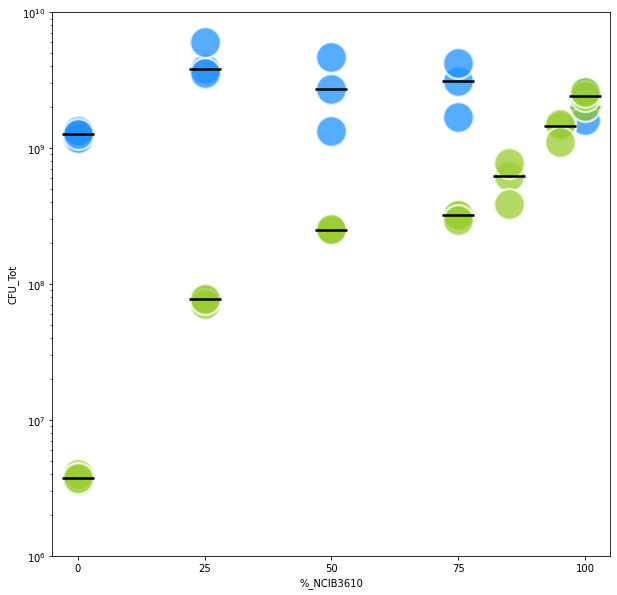

In [23]:
#VISUALISATION OF THE YIELD AT 48H
CFU_msgg_24 = pd.concat([CFU_msgg_0,CFU_msgg_25,CFU_msgg_50,CFU_msgg_75,CFU_msgg_100])
CFU_msgg_24_median = CFU_msgg_24.groupby(['%_NCIB3610']).median()

CFU_msbg_48 = pd.concat([CFU_msbg_0_48,CFU_msbg_25_48,CFU_msbg_50_48,CFU_msbg_75_48,CFU_msbg_85_48,CFU_msbg_95_48,CFU_msbg_100_48])
CFU_msbg_48_median = CFU_msbg_48.groupby(['%_NCIB3610']).median()

fig, axs = plt.subplots(1, 1, figsize=(10,10), sharey=False)

sns.scatterplot(x='%_NCIB3610', y='CFU_Tot', data=CFU_msgg_24, s=950, alpha=0.75, color='Dodgerblue')
sns.scatterplot(x=CFU_msgg_24_median.index, y='CFU_Tot', data=CFU_msgg_24_median, s=1000, color='Black', marker='_')

sns.scatterplot(x='%_NCIB3610', y='CFU_Tot', data=CFU_msbg_48, s=950, alpha=0.75, color='Yellowgreen')
sns.scatterplot(x=CFU_msbg_48_median.index, y='CFU_Tot', data=CFU_msbg_48_median, s=1000, color='Black', marker='_')

plt.ylim(1000000,10000000000)
plt.xticks(np.arange(0,101, step=25))
plt.yscale('log')

plt.savefig("/cluster/nrsw_lab/2392267/Figures/CFU_coculture_1-1.png", dpi = 300)
plt.savefig("/cluster/nrsw_lab/2392267/Figures/CFU_coculture_1-1.svg", dpi = 300)
plt.show()

In [17]:
#ANOVA test
res = stat()
res.anova_stat(df=CFU_msgg_24, res_var='CFU_Tot', anova_model='CFU_Tot ~ C(CFU_NCIB3610)')
res.anova_summary

,df,sum_sq,mean_sq,F,PR(>F)
C(CFU_NCIB3610),10.0,1.945916e+19,1.945916e+18,0.73874,0.683287
Residual,4.0,1.053640e+19,2.634100e+18,NaN,NaN


In [18]:
#ANOVA test
res = stat()
res.anova_stat(df=CFU_msbg_48, res_var='CFU_Tot', anova_model='CFU_Tot ~ C(CFU_NCIB3610)')
res.anova_summary

,df,sum_sq,mean_sq,F,PR(>F)
C(CFU_NCIB3610),17.0,1.359410e+19,7.996530e+17,1332.692578,0.00003
Residual,3.0,1.800084e+15,6.000281e+14,NaN,NaN


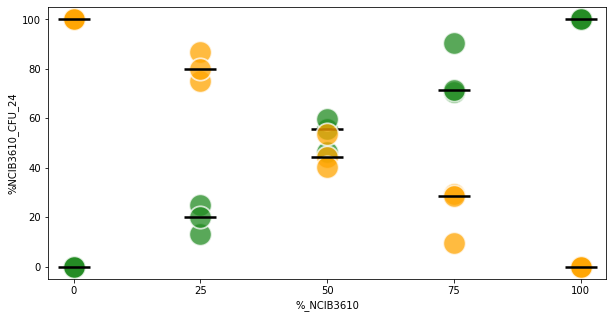

In [19]:
#PROPORTION OF WT AND D8 IN MSGG
fig, axs = plt.subplots(1, 1, figsize=(10, 5), sharey=False)

sns.scatterplot(x='%_NCIB3610', y='%NCIB3610_CFU_24', data=CFU_msgg_24, s=500, alpha=0.75, color='forestgreen')
sns.scatterplot(x=CFU_msgg_24_median.index, y='%NCIB3610_CFU_24', data=CFU_msgg_24_median, s=1000, color='black', marker='_')
sns.scatterplot(x='%_NCIB3610', y='%NRS5645_CFU_24', data=CFU_msgg_24, s=500, alpha=0.75, color='orange')
sns.scatterplot(x=CFU_msgg_24_median.index, y='%NRS5645_CFU_24', data=CFU_msgg_24_median, s=1000, color='black', marker='_')

plt.xticks(np.arange(0,101, step=25))

plt.savefig("/cluster/nrsw_lab/2392267/Figures/CFU_coculture_1-2.png", dpi = 300)
plt.savefig("/cluster/nrsw_lab/2392267/Figures/CFU_coculture_1-2.svg", dpi = 300)
plt.show()

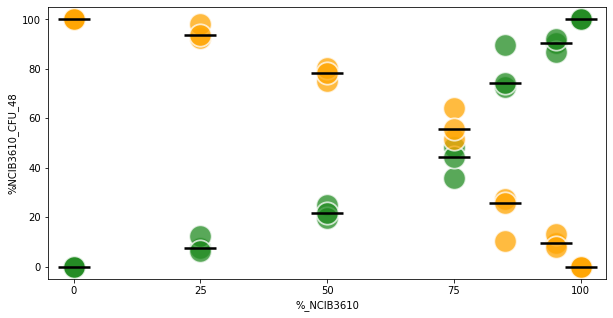

In [20]:
#PROPORTION OF WT AND D8 IN MSBG
fig, axs = plt.subplots(1, 1, figsize=(10, 5), sharey=False)

sns.scatterplot(x='%_NCIB3610', y='%NCIB3610_CFU_48', data=CFU_msbg_48, s=500, alpha=0.75, color='forestgreen')
sns.scatterplot(x=CFU_msbg_48_median.index, y='%NCIB3610_CFU_48', data=CFU_msbg_48_median, s=1000, color='black', marker='_')
sns.scatterplot(x='%_NCIB3610', y='%NRS5645_CFU_48', data=CFU_msbg_48, s=500, alpha=0.75, color='orange')
sns.scatterplot(x=CFU_msbg_48_median.index, y='%NRS5645_CFU_48', data=CFU_msbg_48_median, s=1000, color='black', marker='_')

plt.xticks(np.arange(0,101, step=25))

plt.savefig("/cluster/nrsw_lab/2392267/Figures/CFU_coculture_1-3.png", dpi = 300)
plt.savefig("/cluster/nrsw_lab/2392267/Figures/CFU_coculture_1-3.svg", dpi = 300)
plt.show()

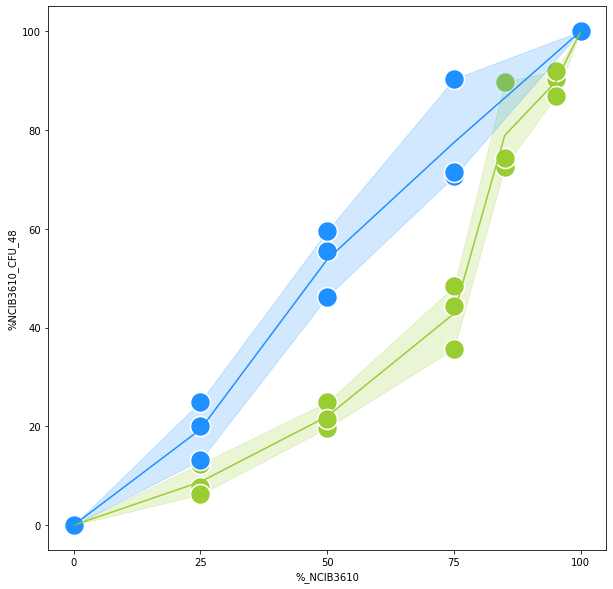

In [21]:
#COMPARISON PROPORTION OF WT IN MSGG AND MSBG 
fig, axs = plt.subplots(1, 1, figsize=(10, 10), sharey=False)

sns.lineplot(x='%_NCIB3610', y='%NCIB3610_CFU_48', data=CFU_msbg_48, color='Yellowgreen')
sns.scatterplot(x='%_NCIB3610', y='%NCIB3610_CFU_48', data=CFU_msbg_48, s=400, color='Yellowgreen')
sns.lineplot(x='%_NCIB3610', y='%NCIB3610_CFU_24', data=CFU_msgg_24, color='Dodgerblue')
sns.scatterplot(x='%_NCIB3610', y='%NCIB3610_CFU_24', data=CFU_msgg_24, s=400, color='Dodgerblue')

plt.xticks(np.arange(0,101, step=25))

plt.savefig("/cluster/nrsw_lab/2392267/Figures/CFU_coculture_1-4.png", dpi = 300)
plt.savefig("/cluster/nrsw_lab/2392267/Figures/CFU_coculture_1-4.svg", dpi = 300)
plt.show()

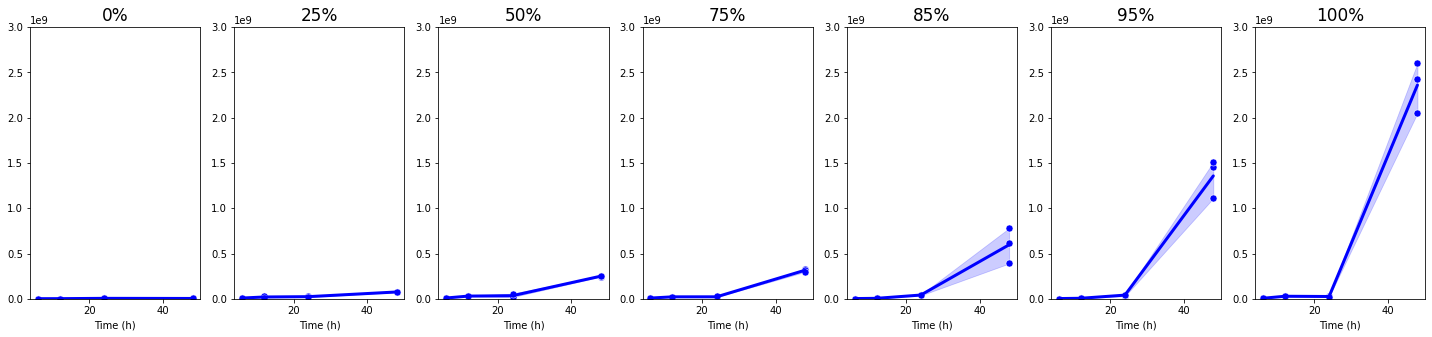

In [49]:
#VISULATION OF THE TOTAL CFU/mL
fig, axs = plt.subplots(1, 7, figsize=(25, 5), sharey=False)
sns.set(context="paper", style="ticks", font_scale= 1.75, rc={"lines.linewidth": 3})

# 0% PRODUCERS
sns.lineplot(x='Timepoint', y='CFU_Tot', data=CFU_msbg_0, color='blue', ax=axs[0])
sns.scatterplot(x='Timepoint', y='CFU_Tot', data=CFU_msbg_0, s=50, color='blue', ax=axs[0])

# 25% PRODUCERS
sns.lineplot(x='Timepoint', y='CFU_Tot', data=CFU_msbg_25, color='blue', ax=axs[1])
sns.scatterplot(x='Timepoint', y='CFU_Tot', data=CFU_msbg_25, s=50, color='blue', ax=axs[1])

# 50% PRODUCERS
sns.lineplot(x='Timepoint', y='CFU_Tot', data=CFU_msbg_50, color='blue', ax=axs[2])
sns.scatterplot(x='Timepoint', y='CFU_Tot', data=CFU_msbg_50, s=50, color='blue', ax=axs[2])

# 75% PRODUCERS
sns.lineplot(x='Timepoint', y='CFU_Tot', data=CFU_msbg_75, color='blue', ax=axs[3])
sns.scatterplot(x='Timepoint', y='CFU_Tot', data=CFU_msbg_75, s=50, color='blue', ax=axs[3])

# 85% PRODUCERS
sns.lineplot(x='Timepoint', y='CFU_Tot', data=CFU_msbg_85, color='blue', ax=axs[4])
sns.scatterplot(x='Timepoint', y='CFU_Tot', data=CFU_msbg_85, s=50, color='blue', ax=axs[4])

# 95% PRODUCERS
sns.lineplot(x='Timepoint', y='CFU_Tot', data=CFU_msbg_95, color='blue', ax=axs[5])
sns.scatterplot(x='Timepoint', y='CFU_Tot', data=CFU_msbg_95, s=50, color='blue', ax=axs[5])

# 100% PRODUCERS
sns.lineplot(x='Timepoint', y='CFU_Tot', data=CFU_msbg_100, color='blue', ax=axs[6])
sns.scatterplot(x='Timepoint', y='CFU_Tot', data=CFU_msbg_100, s=50, color='blue', ax=axs[6])

axs[0].set_ylim(0,3000000000)
axs[1].set_ylim(0,3000000000)
axs[2].set_ylim(0,3000000000)
axs[3].set_ylim(0,3000000000)
axs[4].set_ylim(0,3000000000)
axs[5].set_ylim(0,3000000000)
axs[6].set_ylim(0,3000000000)

axs[0].set_ylabel('')
axs[1].set_ylabel('')
axs[2].set_ylabel('')
axs[3].set_ylabel('')
axs[4].set_ylabel('')
axs[5].set_ylabel('')
axs[6].set_ylabel('')

axs[0].set_xlabel('Time (h)')
axs[1].set_xlabel('Time (h)')
axs[2].set_xlabel('Time (h)')
axs[3].set_xlabel('Time (h)')
axs[4].set_xlabel('Time (h)')
axs[5].set_xlabel('Time (h)')
axs[6].set_xlabel('Time (h)')

axs[0].set_title('0%')
axs[1].set_title('25%')
axs[2].set_title('50%')
axs[3].set_title('75%')
axs[4].set_title('85%')
axs[5].set_title('95%')
axs[6].set_title('100%')

plt.savefig("/cluster/nrsw_lab/2392267/Figures/CFU_coculture_3.png", dpi = 300)
plt.savefig("/cluster/nrsw_lab/2392267/Figures/CFU_coculture_3.svg", dpi = 300)
plt.show()

In [50]:
#STATISTICS
CFU_msbg_48.rename(columns={'%_NCIB3610':'p_NCIB3610'}, inplace=True)
#ANOVA test
res = stat()
res.anova_stat(df=CFU_msbg_48, res_var='CFU_Tot', anova_model='CFU_Tot ~ C(p_NCIB3610)')
res.anova_summary

,df,sum_sq,mean_sq,F,PR(>F)
C(p_NCIB3610),6.0,1.326676e+19,2.211126e+18,94.048878,1.681001e-10
Residual,14.0,3.291455e+17,2.351039e+16,NaN,NaN


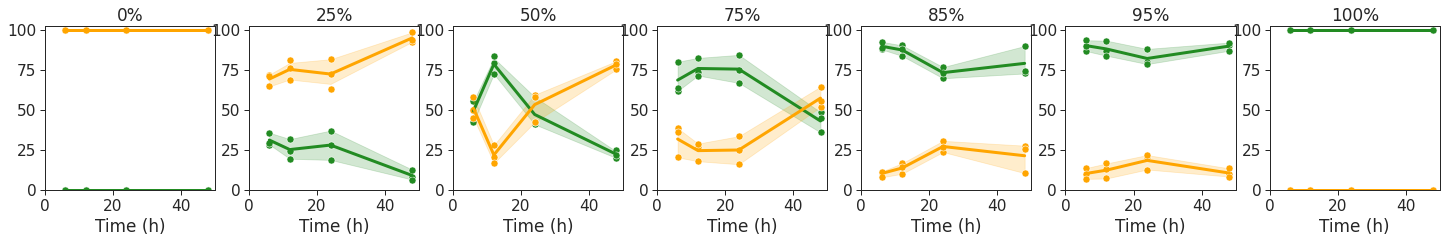

In [51]:
#VISUALISING PROPORTION OF WT AND D8 AT 0,25,50,75,85,95,100 RATIOS

fig, axs = plt.subplots(1, 7, figsize=(25, 3), sharey=False)
sns.set(context="paper", style="ticks", font_scale= 1.75, rc={"lines.linewidth": 3})

# 0% PRODUCERS
sns.lineplot(x='Timepoint', y='%NCIB3610_CFU_48', data=CFU_msbg_0, color='forestgreen', ax=axs[0])
sns.scatterplot(x='Timepoint', y='%NCIB3610_CFU_48', data=CFU_msbg_0, s=50, color='forestgreen', ax=axs[0])
sns.lineplot(x='Timepoint', y='%NRS5645_CFU_48', data=CFU_msbg_0, color='orange', ax=axs[0])
sns.scatterplot(x='Timepoint', y='%NRS5645_CFU_48', data=CFU_msbg_0, s=50, color='orange', ax=axs[0])

# 25% PRODUCERS
sns.lineplot(x='Timepoint', y='%NCIB3610_CFU_48', data=CFU_msbg_25, color='forestgreen', ax=axs[1])
sns.scatterplot(x='Timepoint', y='%NCIB3610_CFU_48', data=CFU_msbg_25, s=50, color='forestgreen', ax=axs[1])
sns.lineplot(x='Timepoint', y='%NRS5645_CFU_48', data=CFU_msbg_25, color='orange', ax=axs[1])
sns.scatterplot(x='Timepoint', y='%NRS5645_CFU_48', data=CFU_msbg_25, s=50, color='orange', ax=axs[1])

# 50% PRODUCERS
sns.lineplot(x='Timepoint', y='%NCIB3610_CFU_48', data=CFU_msbg_50, color='forestgreen', ax=axs[2])
sns.scatterplot(x='Timepoint', y='%NCIB3610_CFU_48', data=CFU_msbg_50, s=50, color='forestgreen', ax=axs[2])
sns.lineplot(x='Timepoint', y='%NRS5645_CFU_48', data=CFU_msbg_50, color='orange', ax=axs[2])
sns.scatterplot(x='Timepoint', y='%NRS5645_CFU_48', data=CFU_msbg_50, s=50, color='orange', ax=axs[2])

# 75% PRODUCERS
sns.lineplot(x='Timepoint', y='%NCIB3610_CFU_48', data=CFU_msbg_75, color='forestgreen', ax=axs[3])
sns.scatterplot(x='Timepoint', y='%NCIB3610_CFU_48', data=CFU_msbg_75, s=50, color='forestgreen', ax=axs[3])
sns.lineplot(x='Timepoint', y='%NRS5645_CFU_48', data=CFU_msbg_75, color='orange', ax=axs[3])
sns.scatterplot(x='Timepoint', y='%NRS5645_CFU_48', data=CFU_msbg_75, s=50, color='orange', ax=axs[3])

# 85% PRODUCERS
sns.lineplot(x='Timepoint', y='%NCIB3610_CFU_48', data=CFU_msbg_85, color='forestgreen', ax=axs[4])
sns.scatterplot(x='Timepoint', y='%NCIB3610_CFU_48', data=CFU_msbg_85, s=50, color='forestgreen', ax=axs[4])
sns.lineplot(x='Timepoint', y='%NRS5645_CFU_48', data=CFU_msbg_85, color='orange', ax=axs[4])
sns.scatterplot(x='Timepoint', y='%NRS5645_CFU_48', data=CFU_msbg_85, s=50, color='orange', ax=axs[4])

# 95% PRODUCERS
sns.lineplot(x='Timepoint', y='%NCIB3610_CFU_48', data=CFU_msbg_95, color='forestgreen', ax=axs[5])
sns.scatterplot(x='Timepoint', y='%NCIB3610_CFU_48', data=CFU_msbg_95, s=50, color='forestgreen', ax=axs[5])
sns.lineplot(x='Timepoint', y='%NRS5645_CFU_48', data=CFU_msbg_95, color='orange', ax=axs[5])
sns.scatterplot(x='Timepoint', y='%NRS5645_CFU_48', data=CFU_msbg_95, s=50, color='orange', ax=axs[5])

# 100% PRODUCERS
sns.lineplot(x='Timepoint', y='%NCIB3610_CFU_48', data=CFU_msbg_100, color='forestgreen', ax=axs[6])
sns.scatterplot(x='Timepoint', y='%NCIB3610_CFU_48', data=CFU_msbg_100, s=50, color='forestgreen', ax=axs[6])
sns.lineplot(x='Timepoint', y='%NRS5645_CFU_48', data=CFU_msbg_100, color='orange', ax=axs[6])
sns.scatterplot(x='Timepoint', y='%NRS5645_CFU_48', data=CFU_msbg_100, s=50, color='orange', ax=axs[6])

axs[0].set_ylim(0,102)
axs[1].set_ylim(0,102)
axs[2].set_ylim(0,102)
axs[3].set_ylim(0,102)
axs[4].set_ylim(0,102)
axs[5].set_ylim(0,102)
axs[6].set_ylim(0,102)

axs[0].set_xlim(0,50)
axs[1].set_xlim(0,50)
axs[2].set_xlim(0,50)
axs[3].set_xlim(0,50)
axs[4].set_xlim(0,50)
axs[5].set_xlim(0,50)
axs[6].set_xlim(0,50)

axs[0].set_ylabel('')
axs[1].set_ylabel('')
axs[2].set_ylabel('')
axs[3].set_ylabel('')
axs[4].set_ylabel('')
axs[5].set_ylabel('')
axs[6].set_ylabel('')

axs[0].set_xlabel('Time (h)')
axs[1].set_xlabel('Time (h)')
axs[2].set_xlabel('Time (h)')
axs[3].set_xlabel('Time (h)')
axs[4].set_xlabel('Time (h)')
axs[5].set_xlabel('Time (h)')
axs[6].set_xlabel('Time (h)')

axs[0].set_title('0%')
axs[1].set_title('25%')
axs[2].set_title('50%')
axs[3].set_title('75%')
axs[4].set_title('85%')
axs[5].set_title('95%')
axs[6].set_title('100%')

plt.savefig("/cluster/nrsw_lab/2392267/Figures/CFU_coculture_4.png", dpi = 300)
plt.savefig("/cluster/nrsw_lab/2392267/Figures/CFU_coculture_4.svg", dpi = 300)
plt.show()